In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import matplotlib
import matplotlib.ticker as ticker

plt.rc('font', family='serif') 
plt.rc('mathtext',**{'default':'regular'}) 
plt.rc('axes', linewidth=1.5)

%matplotlib inline 
%config InlineBackend.figure_format='retina'

In [2]:
# names & colors

expsa=('C96','C192','C384','C768','C1536')
expsi=('T63','T85','T127','T213','T255')
ccode=('#000000','#4B4B4B','#C4C4C4','#FF9001','#FF4200')

# grid spacing

resa=[100,50,25,13,6]
resi=[318,236,158,94,79]


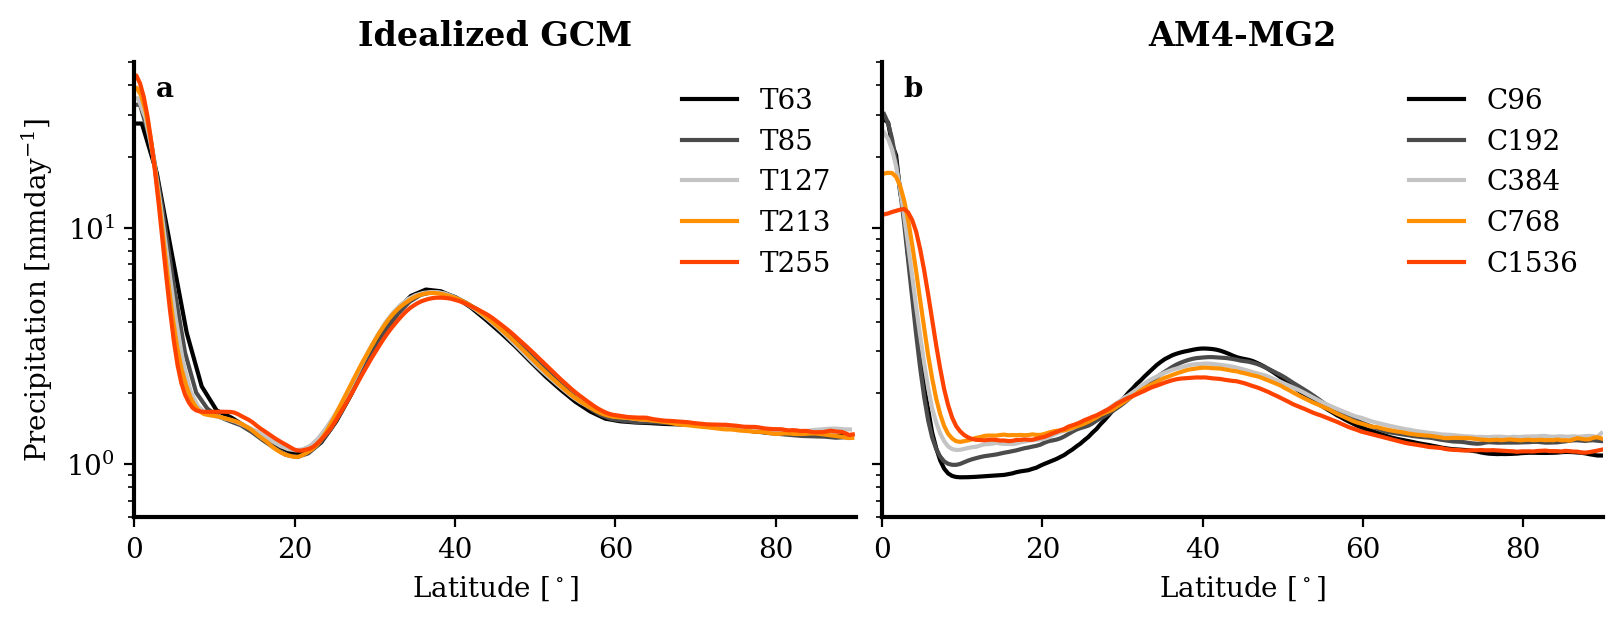

In [3]:

fig,axs=plt.subplots(1,2,sharex=True,sharey=True,layout='constrained',figsize=(8,3))

for iexp in range(0,len(expsa)):
    
    ds=np.load('meridional_'+expsa[iexp]+'.npz')
    axs[1].plot(ds['LAT'],ds['PREC'],color=ccode[iexp])
    
axs[1].legend(expsa,frameon=False)
axs[1].set(xlim=(0,90),xlabel='Latitude [$^\circ$]')
axs[1].set_title('AM4-MG2',fontweight='bold')


for iexp in range(0,len(expsi)):

    ds=np.load('meridional_'+expsi[iexp]+'.npz')
    axs[0].plot(ds['LAT'],ds['PREC'],'-',color=ccode[iexp])
    
axs[0].legend(expsi,frameon=False)
axs[0].set(ylabel='Precipitation [mm$day^{-1}$]',yscale='log',ylim=(0.6,50))
axs[0].set(xlabel='Latitude [$^\circ$]',yscale='log',ylim=(0.6,50))
axs[0].set_title('Idealized GCM',fontweight='bold')

# makeup
axs[0].text(0.03, 0.97, 'a', transform=axs[0].transAxes, ha='left', va='top',fontweight='bold')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].text(0.03, 0.97, 'b', transform=axs[1].transAxes, ha='left', va='top',fontweight='bold')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

plt.show()

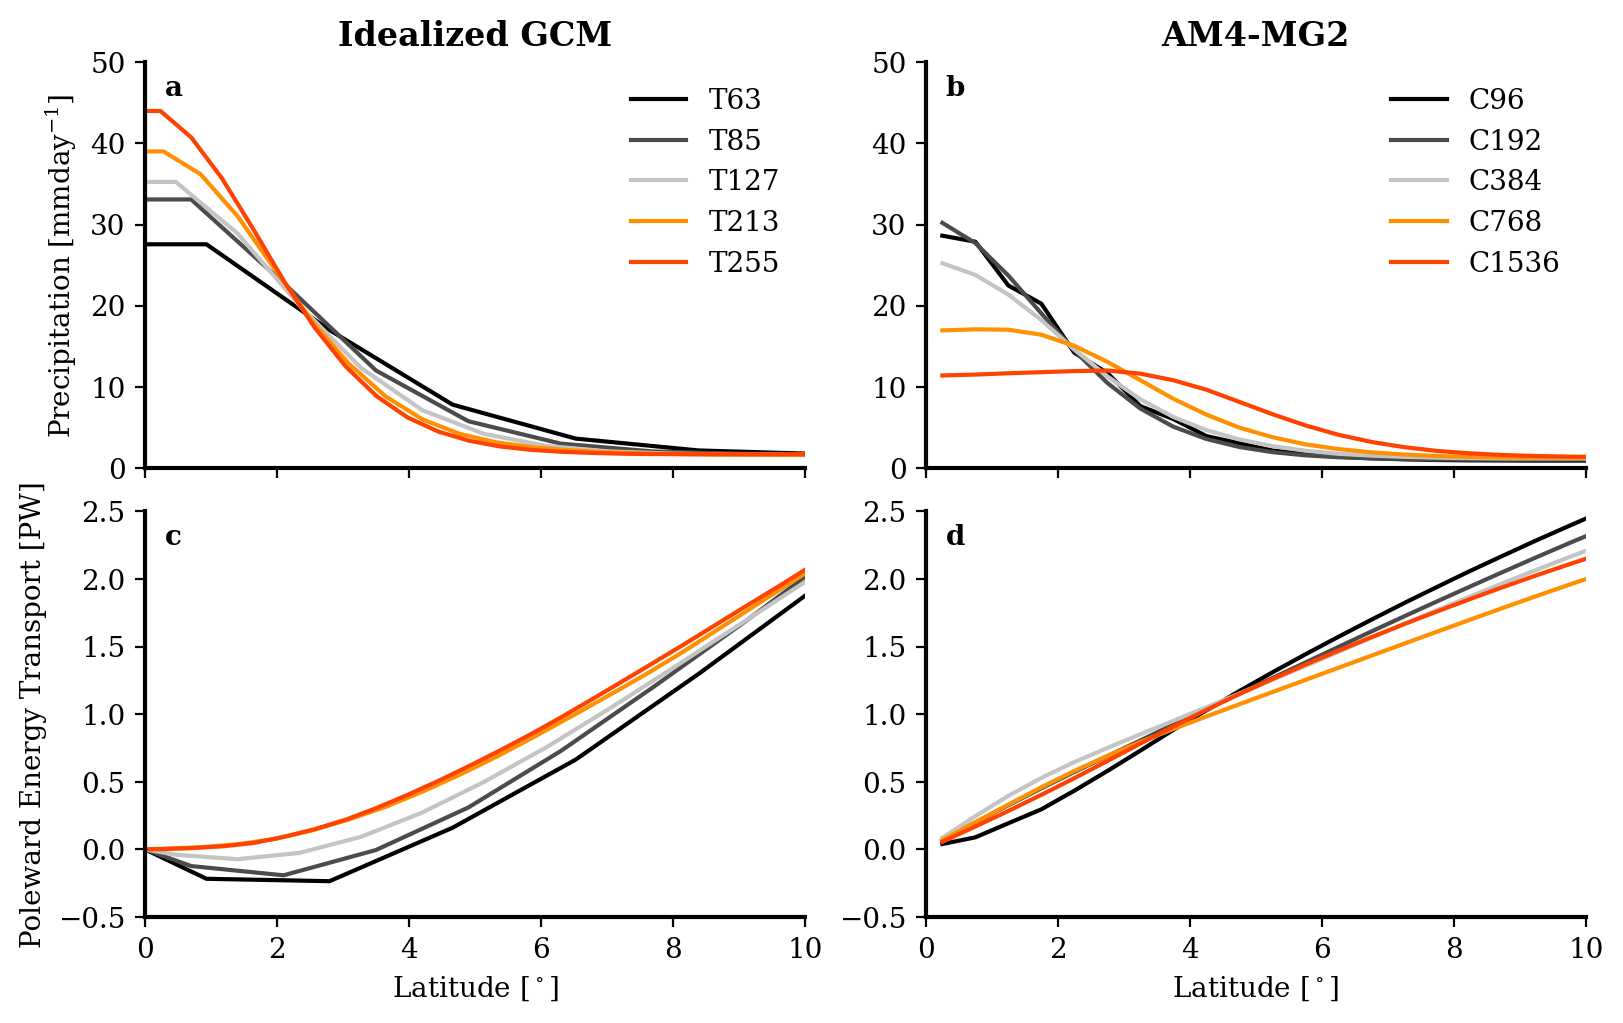

In [4]:

fig,axs=plt.subplots(2,2,sharex=True,layout='constrained',figsize=(8,5))

for iexp in range(0,len(expsa)):

    ds=np.load('meridional_'+expsa[iexp]+'.npz')
    axs[0,1].plot(ds['LAT'],ds['PREC'],color=ccode[iexp])
    axs[1,1].plot(ds['LAT20'],ds['TET']/1e15,color=ccode[iexp])
    
axs[0,1].legend(expsa,frameon=False)
axs[0,0].set(ylabel='Precipitation [mm$day^{-1}$]',ylim=(0,50),xlim=(0,10))
axs[0,1].set_title('AM4-MG2',fontweight='bold')
axs[1,0].set(xlim=(0,10),xlabel='Latitude [$^\circ$]',ylabel='Poleward Energy Transport [PW]',ylim=(-0.5,2.5))


for iexp in range(0,len(expsi)):

    ds=np.load('meridional_'+expsi[iexp]+'.npz')
    axs[0,0].plot(ds['LAT'],ds['PREC'],color=ccode[iexp])
    axs[1,0].plot(ds['LAT'],ds['TET']/1e15,color=ccode[iexp])
   
axs[0,0].legend(expsi,frameon=False)
axs[0,1].set(ylim=(0,50))
axs[0,0].set_title('Idealized GCM',fontweight='bold')
axs[1,1].set(xlabel='Latitude [$^\circ$]',ylim=(-0.5,2.5))

# makeup
axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

plt.show()

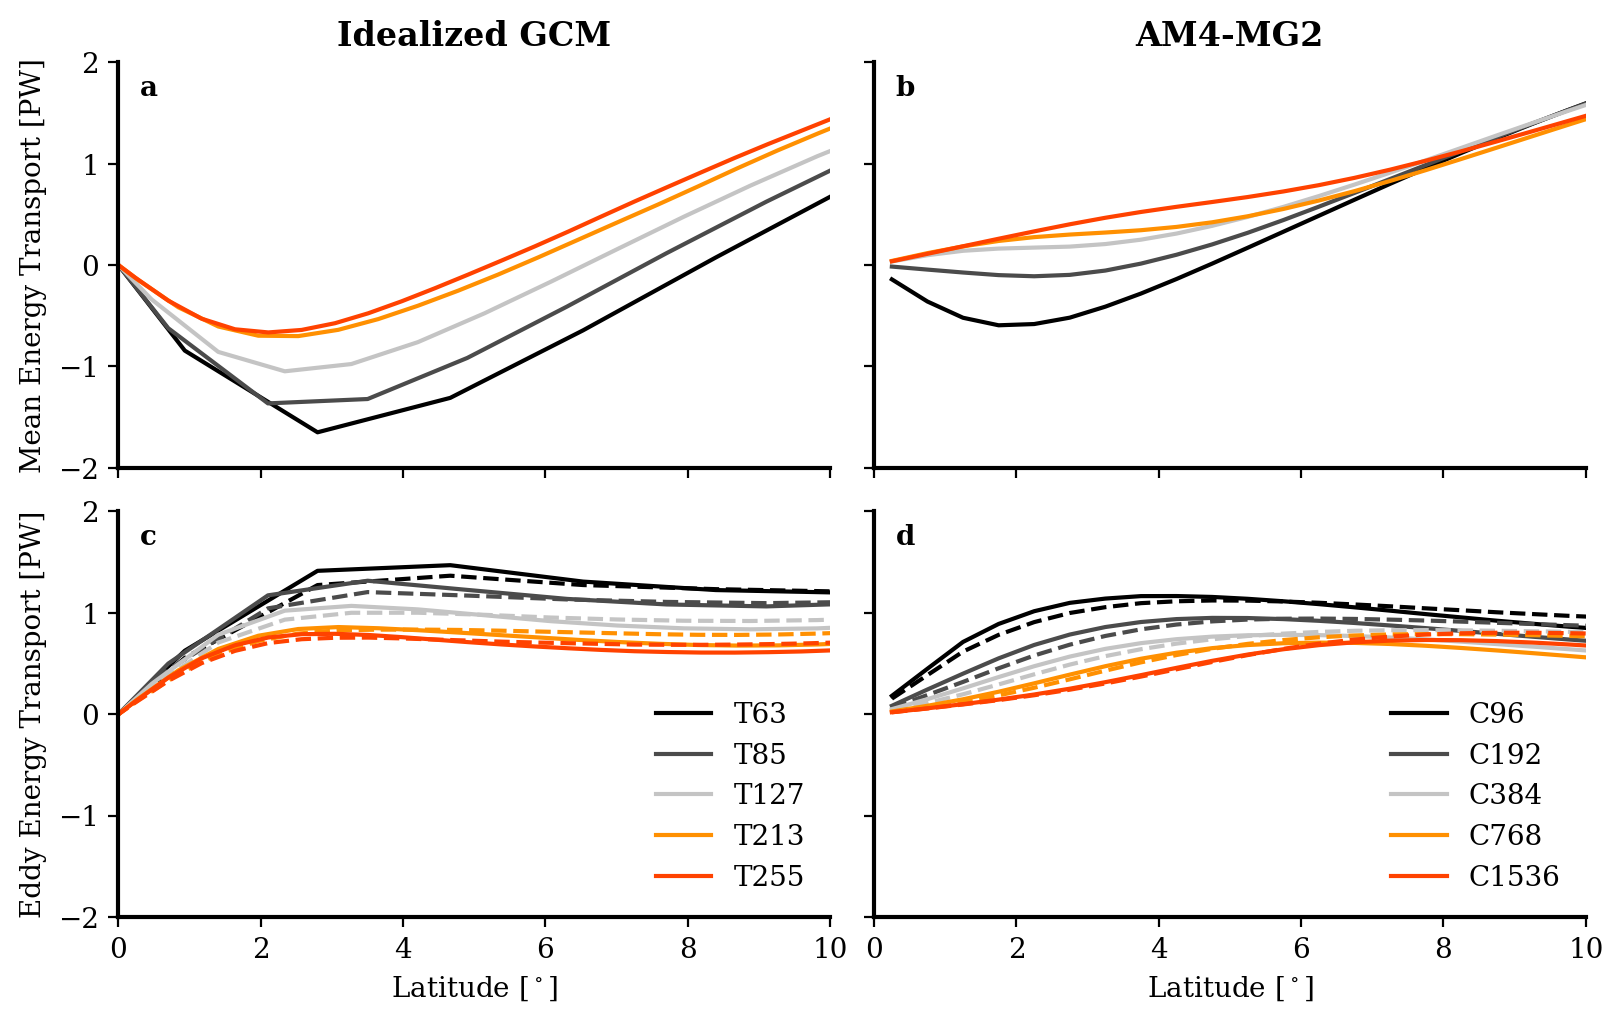

In [5]:

fig,axs=plt.subplots(2,2,sharex=True,sharey=True,layout='constrained',figsize=(8,5))
for iexp in range(0,len(expsa)):

    ds=np.load('meridional_'+expsa[iexp]+'.npz')
    axs[0,1].plot(ds['LAT20'],ds['MET']/1e15,color=ccode[iexp])
    axs[1,1].plot(ds['LAT20'],(ds['TET']-ds['MET'])/1e15,color=ccode[iexp],label=expsa[iexp])
    axs[1,1].plot(ds['LAT20'],ds['ELET']/1e15,linestyle='--',color=ccode[iexp],label=None)
    
axs[1,1].legend(frameon=False)
axs[0,0].set(ylabel='Mean Energy Transport [PW]',ylim=(-2,2),xlim=(0,10))
axs[0,1].set_title('AM4-MG2',fontweight='bold')
axs[1,0].set(xlabel='Latitude [$^\circ$]',ylabel='Eddy Energy Transport [PW]')

for iexp in range(0,len(expsi)):
       
    ds=np.load('meridional_'+expsi[iexp]+'.npz')
    axs[0,0].plot(ds['LAT'],ds['MET']/1e15,color=ccode[iexp])
    axs[1,0].plot(ds['LAT'],(ds['TET']-ds['MET'])/1e15,color=ccode[iexp],label=expsi[iexp])
    axs[1,0].plot(ds['LAT'],ds['ELET']/1e15,linestyle='--',color=ccode[iexp],label=None)
   
axs[1,0].legend(frameon=False)
axs[0,0].set_title('Idealized GCM',fontweight='bold')
axs[1,1].set(xlabel='Latitude [$^\circ$]')

# makeup
axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

plt.show()


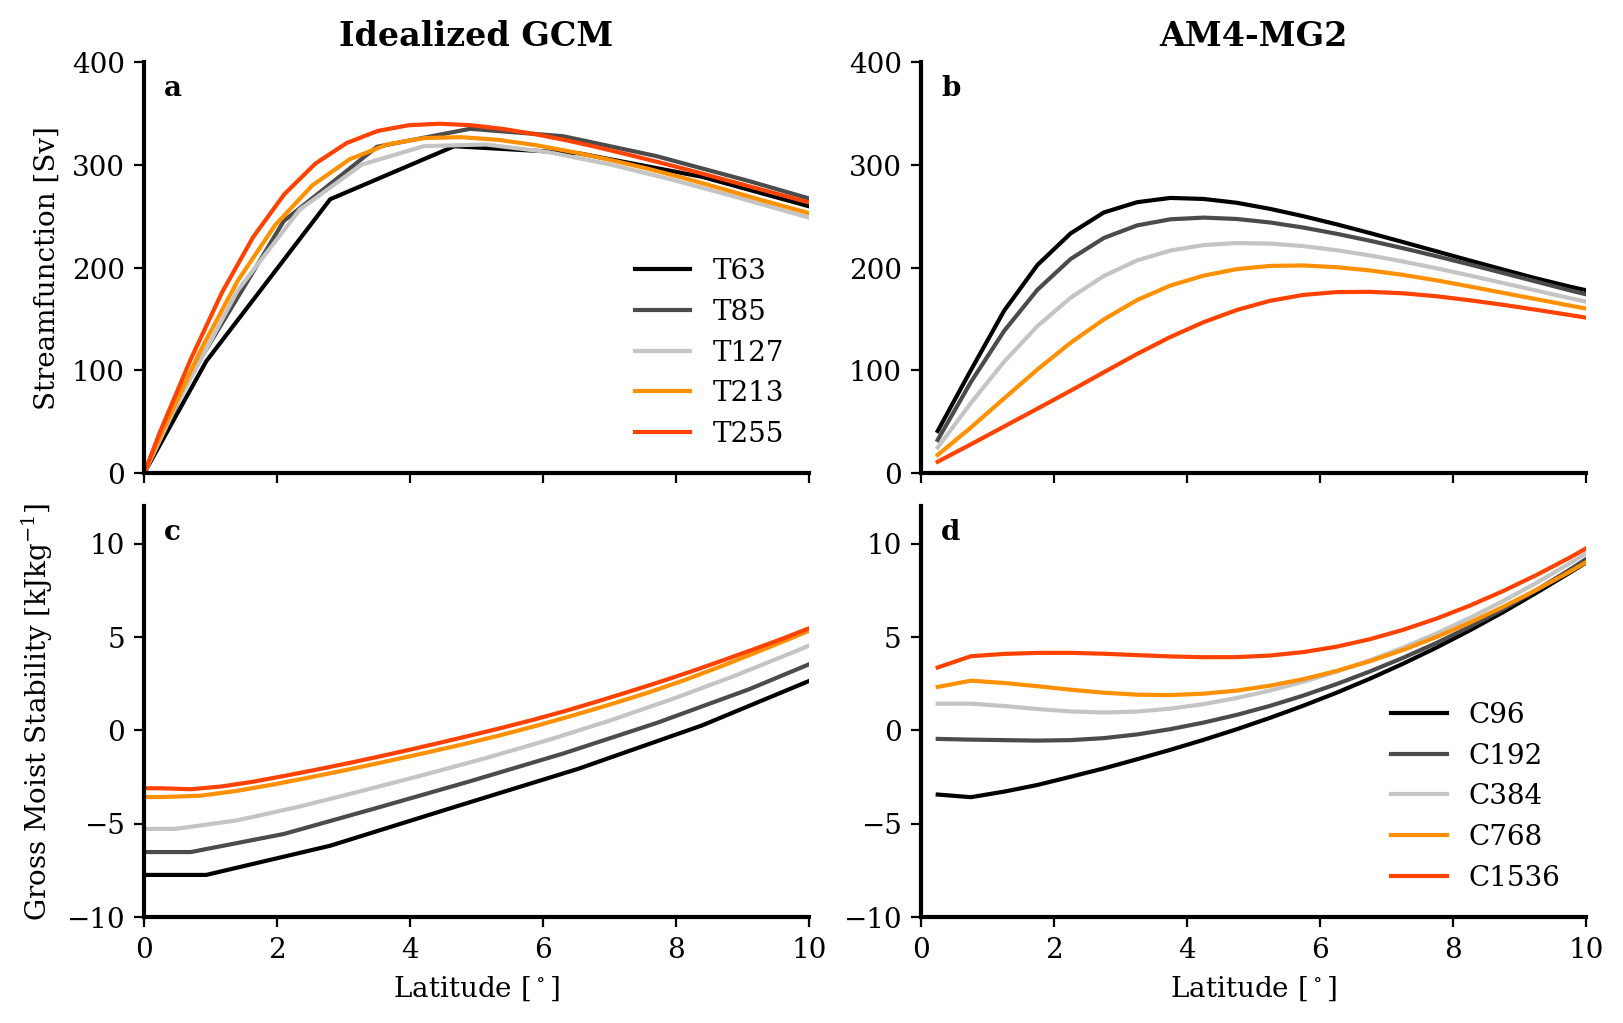

In [6]:
fig,axs=plt.subplots(2,2,sharex=True,layout='constrained',figsize=(8,5))
for iexp in range(0,len(expsa)):

    ds=np.load('meridional_'+expsa[iexp]+'.npz')
    axs[0,1].plot(ds['LAT20'],ds['PSI']/1e9,color=ccode[iexp])
    axs[1,1].plot(ds['LAT20'],ds['MET']/ds['PSI']/1e3,color=ccode[iexp],label=expsa[iexp])
    
axs[1,1].legend(frameon=False)
axs[0,0].set(ylabel='Streamfunction [Sv]',ylim=(0,400),xlim=(0,10))
axs[0,1].set_title('AM4-MG2',fontweight='bold')
axs[1,0].set(xlabel='Latitude [$^\circ$]',ylabel='Gross Moist Stability [kJ$kg^{-1}$]',ylim=(-10,12))


for iexp in range(0,len(expsi)):

    ds=np.load('meridional_'+expsi[iexp]+'.npz')
    axs[0,0].plot(ds['LAT'],ds['PSI']/1e9,color=ccode[iexp],label=expsi[iexp])
    axs[1,0].plot(ds['LAT'],ds['MET']/ds['PSI']/1e3,color=ccode[iexp])

axs[0,0].legend(frameon=False)
axs[0,1].set(ylim=(0,400))
axs[0,0].set_title('Idealized GCM',fontweight='bold')
axs[1,1].set(xlabel='Latitude [$^\circ$]',ylim=(-10,12))

# makeup
axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

plt.show()

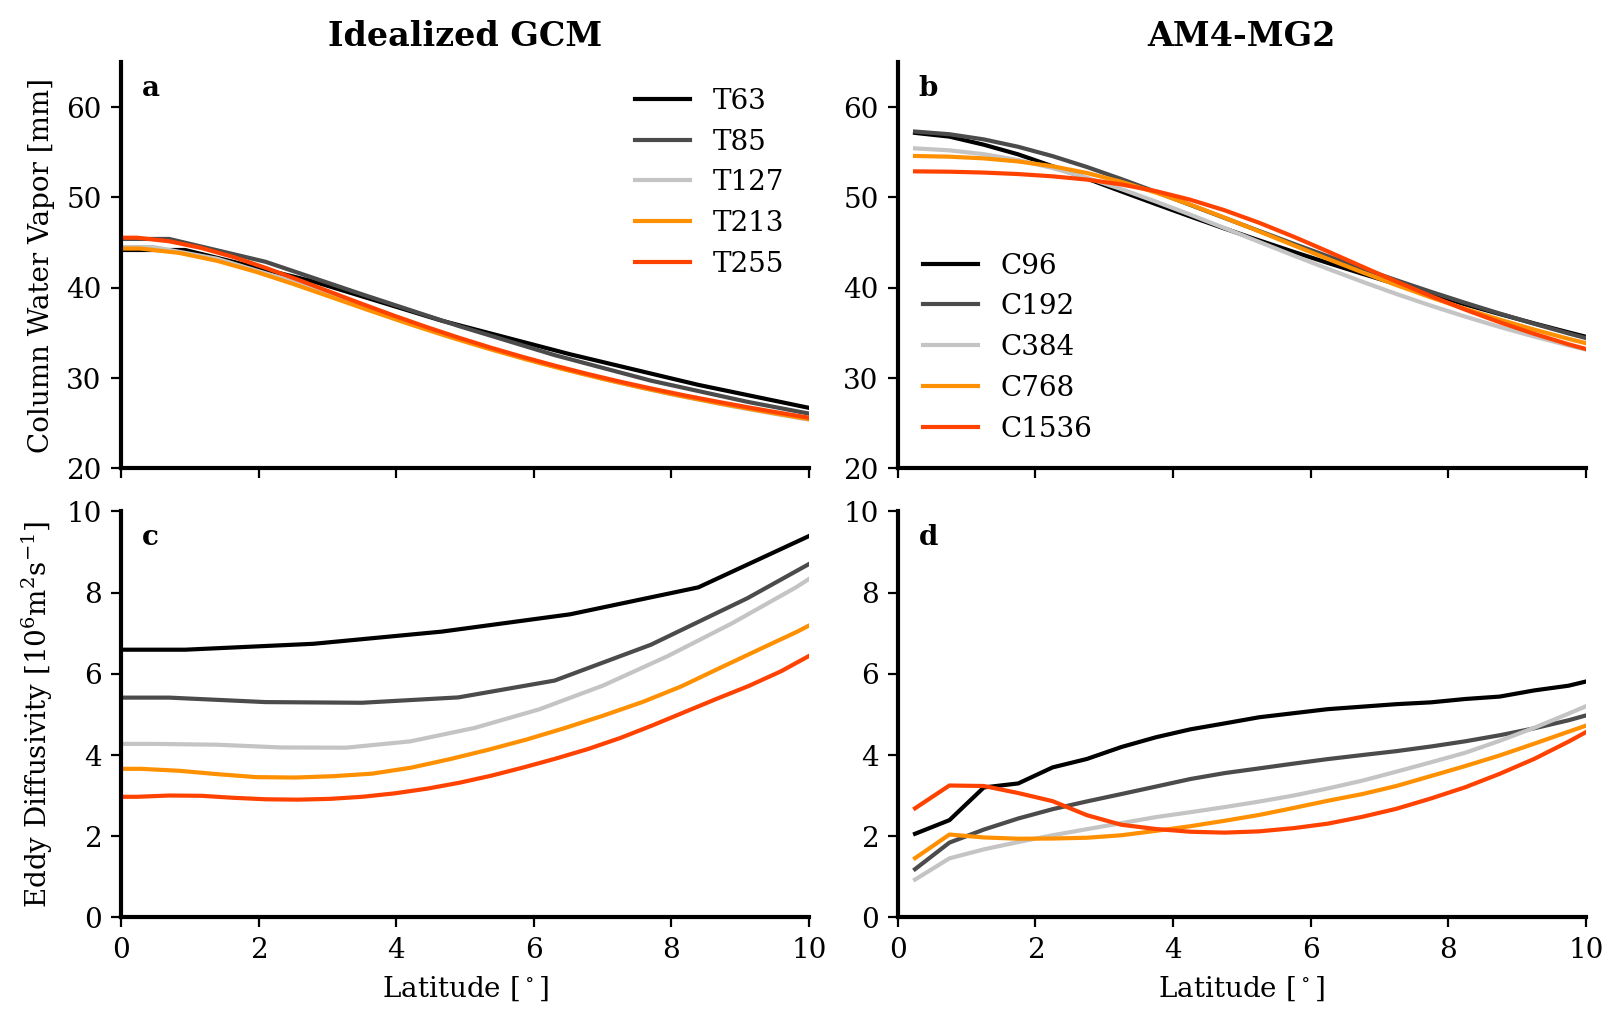

In [7]:

fig,axs=plt.subplots(2,2,sharex=True,layout='constrained',figsize=(8,5))
for iexp in range(0,len(expsa)):

    ds=np.load('meridional_'+expsa[iexp]+'.npz')
    axs[0,1].plot(ds['LAT20'],ds['CWV'],color=ccode[iexp],label=expsa[iexp])
    axs[1,1].plot(ds['LAT20'],ds['D']/1e5,color=ccode[iexp])

axs[0,1].legend(frameon=False)
axs[0,0].set(ylabel='Column Water Vapor [mm]',ylim=(20,65),xlim=(0,10))
axs[0,1].set_title('AM4-MG2',fontweight='bold')
axs[1,0].set(xlabel='Latitude [$^\circ$]',ylabel='Eddy Diffusivity [$10^6m^2s^{-1}$]',ylim=(0,10))


for iexp in range(0,len(expsi)):

    ds=np.load('meridional_'+expsi[iexp]+'.npz')
    axs[0,0].plot(ds['LAT'],ds['CWV'],color=ccode[iexp],label=expsi[iexp])
    axs[1,0].plot(ds['LAT'],ds['D']/1e5,color=ccode[iexp])

axs[0,0].legend(frameon=False)
axs[0,1].set(ylim=(20,65))
axs[0,0].set_title('Idealized GCM',fontweight='bold')
axs[1,1].set(xlabel='Latitude [$^\circ$]',ylim=(0,10))


# makeup
axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

plt.show()

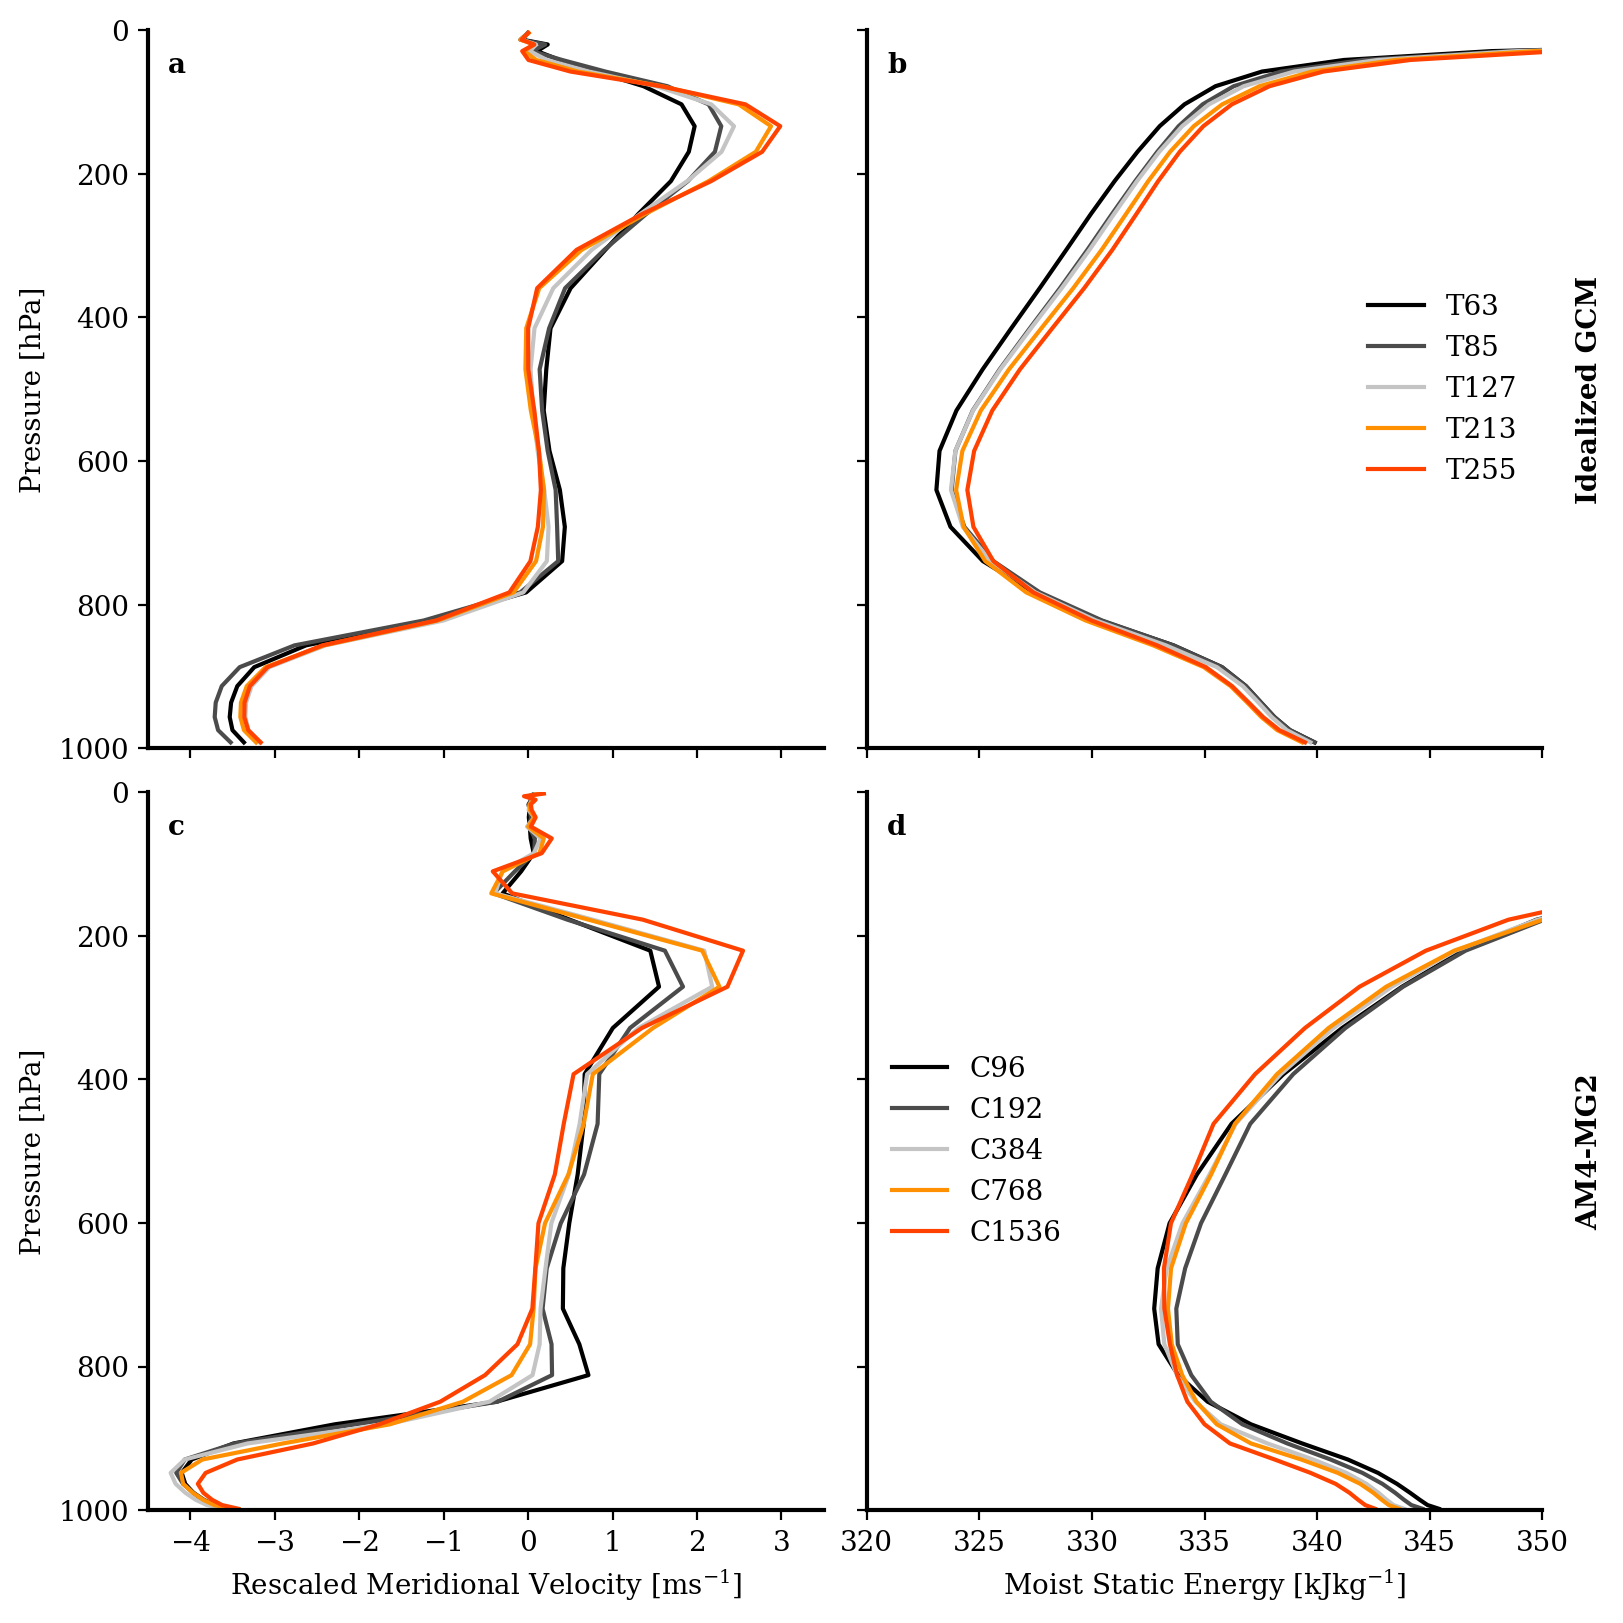

In [8]:
fig,axs=plt.subplots(2,2,layout='constrained',sharey=True,figsize=(8,8))


for iexp in range(0,len(expsi)):
    
    ds=np.load('vertical_'+expsi[iexp]+'.npz')
    axs[0,0].plot(ds['V'],ds['PFULL'],color=ccode[iexp],label=expsi[iexp])
    axs[0,1].plot(ds['H']/1e3,ds['PFULL'],color=ccode[iexp],label=expsi[iexp])

axs[0,1].legend(frameon=False,loc='center right')
axs[0,1].text(1.05, 0.5, 'Idealized GCM', fontweight='bold',rotation=90, transform=axs[0,1].transAxes, va='center')
axs[0,0].set(ylim=(1000,0),ylabel='Pressure [hPa]',xlim=(-4.5,3.5))
axs[0,1].set(ylim=(1000,0),xlim=(320,350))


for iexp in range(0,len(expsa)):

    ds=np.load('vertical_'+expsa[iexp]+'.npz')
    axs[1,0].plot(ds['V'],ds['LEV'],color=ccode[iexp],label=expsa[iexp])
    axs[1,1].plot(ds['H']/1e3,ds['LEV'],color=ccode[iexp],label=expsa[iexp])

axs[1,1].legend(frameon=False,loc='center left')
axs[1,1].text(1.05, 0.5, 'AM4-MG2', fontweight='bold',rotation=90, transform=axs[1,1].transAxes, va='center')
axs[1,0].set(ylabel='Pressure [hPa]',xlabel='Rescaled Meridional Velocity [$ms^{-1}$]',xlim=(-4.5,3.5))
axs[1,1].set(xlim=(320,350),xlabel=r'Moist Static Energy [$kJkg^{-1}$]')

# makeup
axs[0,0].set(xticklabels=[])
axs[0,1].set(xticklabels=[])

axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

plt.show()

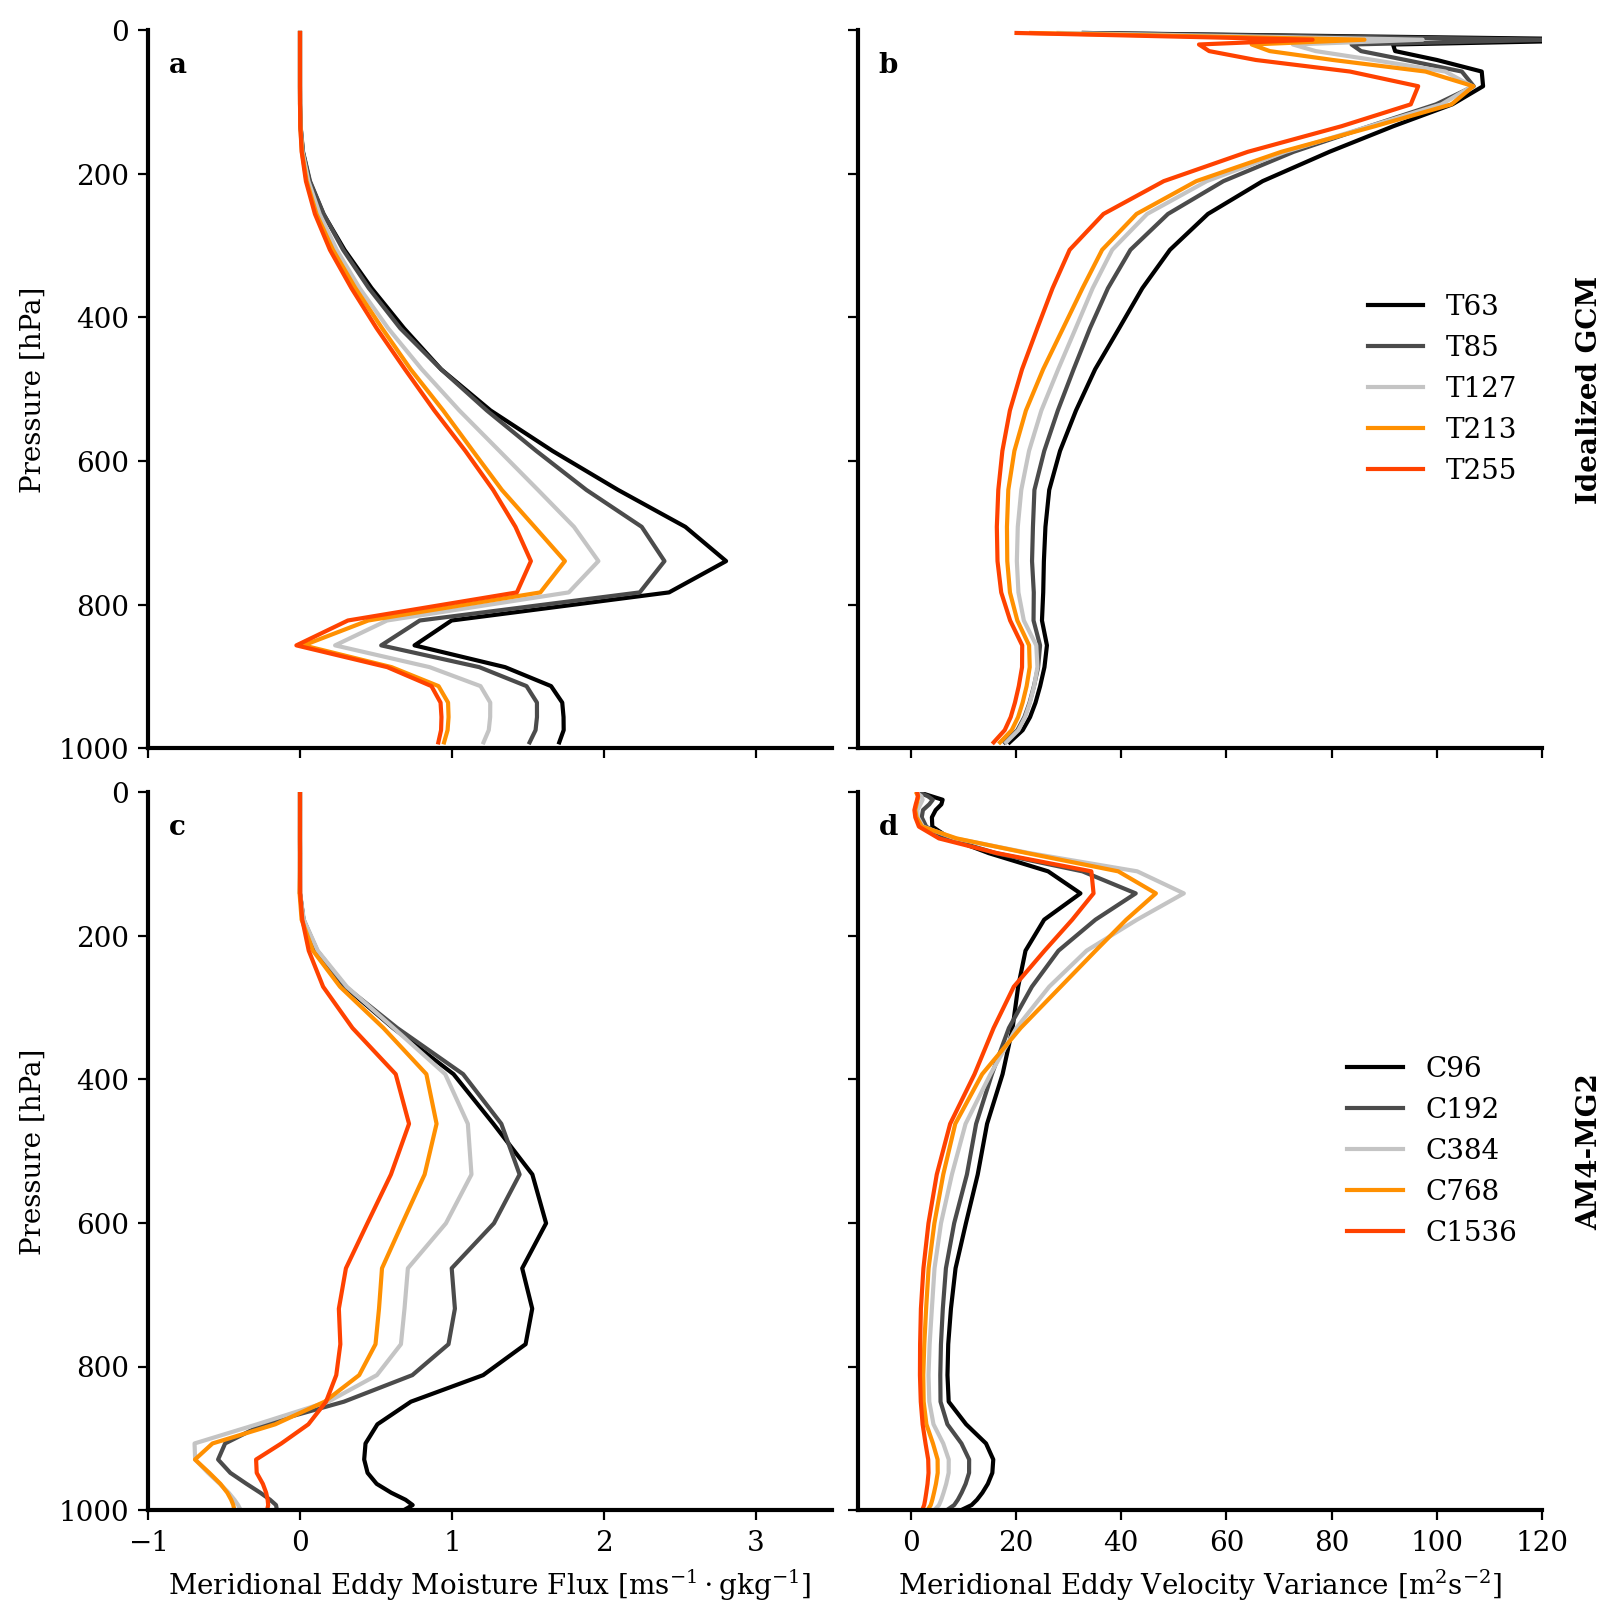

In [9]:
fig,axs=plt.subplots(2,2,layout='constrained',sharey=True,figsize=(8,8))

for iexp in range(0,len(expsa)):
    ds=np.load('vertical_'+expsa[iexp]+'.npz')
    
    axs[1,0].plot(ds['VQ']*1e3,ds['LEV'],color=ccode[iexp],label=expsa[iexp])
    axs[1,1].plot(ds['V2'],ds['LEV'],color=ccode[iexp],label=expsa[iexp])

axs[1,1].legend(frameon=False,loc='center right')
axs[1,1].text(1.05, 0.5, 'AM4-MG2', fontweight='bold',rotation=90, transform=axs[1,1].transAxes, va='center')
axs[0,0].set(ylim=(1000,0),ylabel='Pressure [hPa]',xlim=(-1,3.5))
axs[0,1].set(ylim=(1000,0),xlim=(-10,120))

for iexp in range(0,len(expsi)):

    ds=np.load('vertical_'+expsi[iexp]+'.npz')
    axs[0,0].plot(ds['VQ']*1e3,ds['PFULL'],color=ccode[iexp],label=expsi[iexp])
    axs[0,1].plot(ds['V2'],ds['PFULL'],color=ccode[iexp],label=expsi[iexp])

    
axs[0,1].legend(frameon=False,loc='center right')
axs[1,0].set(ylabel='Pressure [hPa]',xlabel='Meridional Eddy Moisture Flux [$ms^{-1}\cdot gkg^{-1}$]',xlim=(-1,3.5))
axs[0,1].text(1.05, 0.5, 'Idealized GCM', fontweight='bold',rotation=90, transform=axs[0,1].transAxes, va='center')
axs[1,1].set(xlim=(-10,120),xlabel=r'Meridional Eddy Velocity Variance [$m^{2}s^{-2}$]')


# makeup
axs[0,0].set(xticklabels=[])
axs[0,1].set(xticklabels=[])

axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

plt.show()

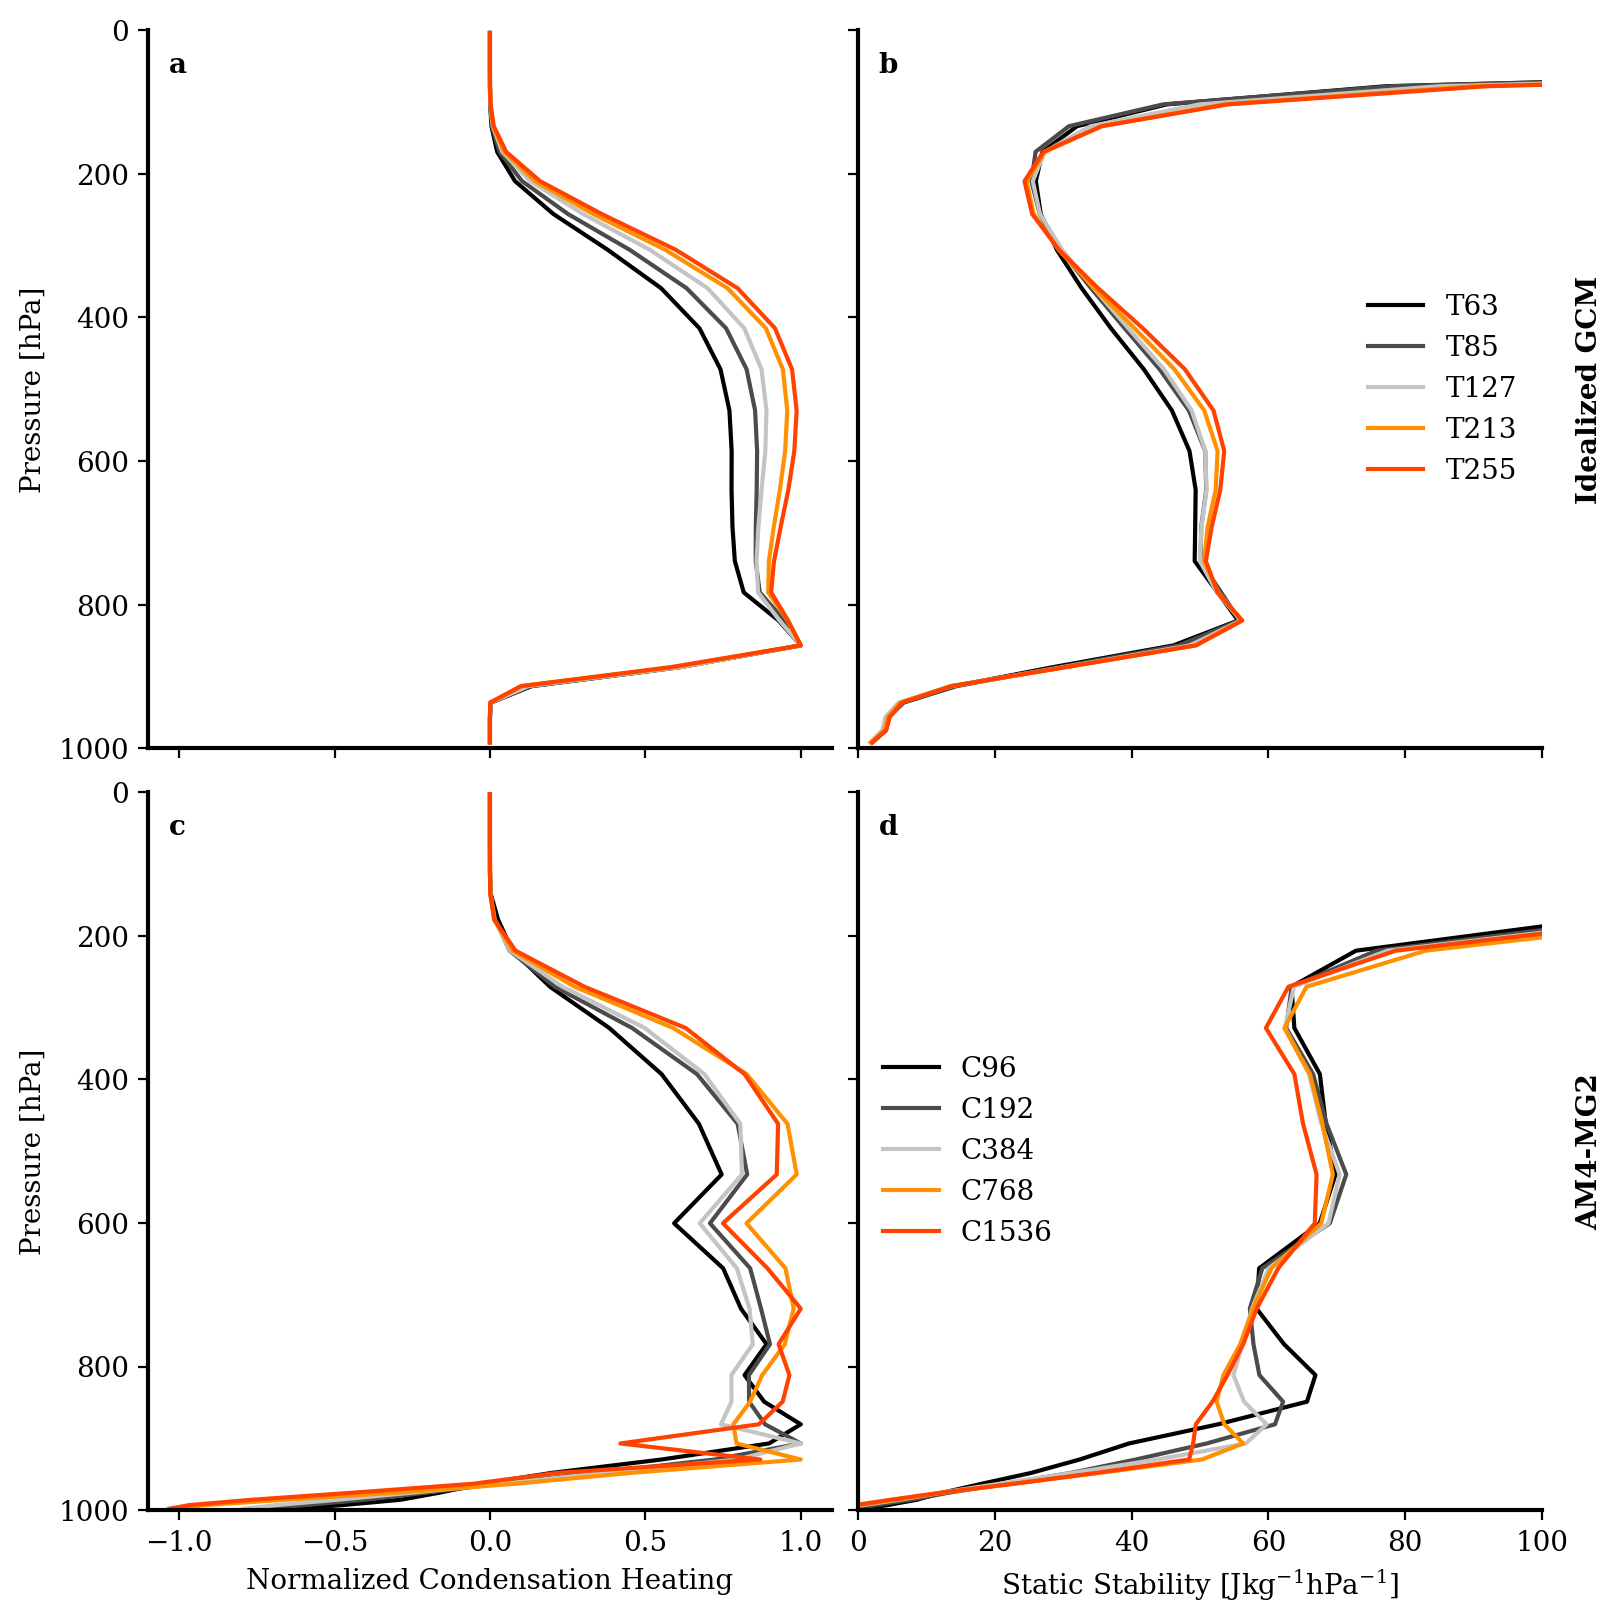

In [10]:

fig,axs=plt.subplots(2,2,layout='constrained',sharey=True,figsize=(8,8))

for iexp in range(0,len(expsa)):

    ds=np.load('vertical_'+expsa[iexp]+'.npz')
    axs[1,0].plot(ds['QC']/np.amax(ds['QC']),ds['LEV'],color=ccode[iexp],label=expsa[iexp])
    axs[1,1].plot(ds['DSDP'],ds['LEV'],color=ccode[iexp],label=expsa[iexp])

axs[1,1].legend(frameon=False,loc='center left')
axs[1,1].text(1.05, 0.5, 'AM4-MG2', fontweight='bold',rotation=90, transform=axs[1,1].transAxes, va='center')
axs[0,0].set(ylim=(1000,0),ylabel='Pressure [hPa]',xlim=(-1.1,1.1))
axs[0,1].set(ylim=(1000,0),xlim=(0,100))

for iexp in range(0,len(expsi)):
     
    ds=np.load('vertical_'+expsi[iexp]+'.npz')
    axs[0,0].plot(ds['QC']/np.amax(ds['QC']),ds['PFULL'],color=ccode[iexp],label=expsi[iexp])
    axs[0,1].plot(ds['DSDP'],ds['PFULL'],color=ccode[iexp],label=expsi[iexp])

axs[0,1].legend(frameon=False,loc='center right')
axs[1,0].set(ylabel='Pressure [hPa]',xlabel='Normalized Condensation Heating',xlim=(-1.1,1.1))
axs[0,1].text(1.05, 0.5, 'Idealized GCM', fontweight='bold',rotation=90, transform=axs[0,1].transAxes, va='center')
axs[1,1].set(xlabel=r'Static Stability [$Jkg^{-1}hPa^{-1}$]',xlim=(0,100))


# makeup
axs[0,0].set(xticklabels=[])
axs[0,1].set(xticklabels=[])

axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

plt.show()

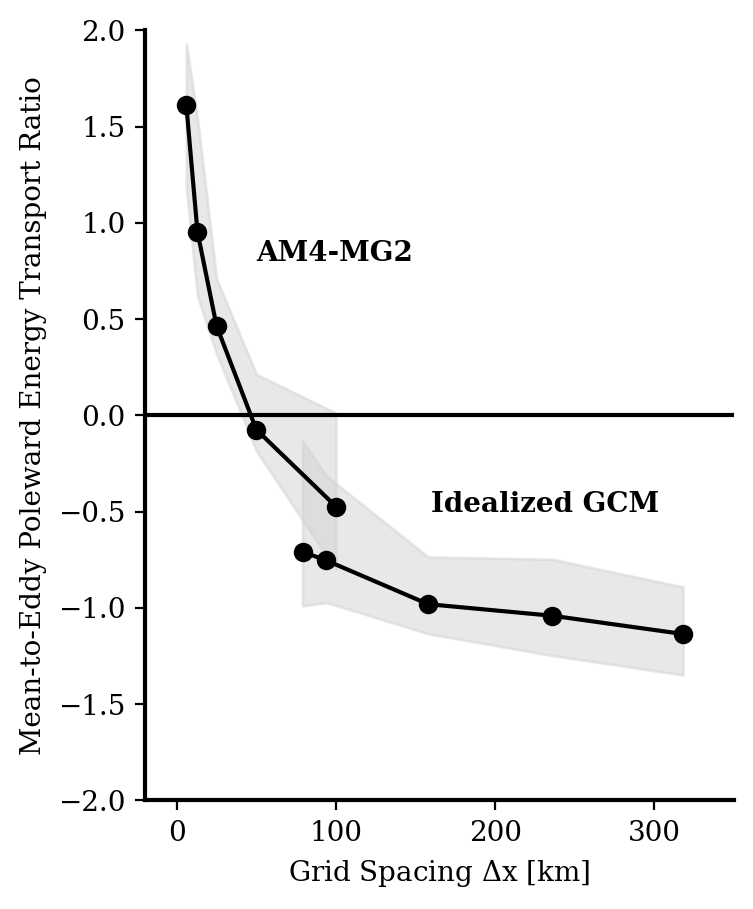

In [11]:

Ri=np.zeros([len(expsi),3])
Ra=np.zeros([len(expsa),3])

for iexp in range(0,len(expsi)):
    
    ds=np.load('meridional_'+expsi[iexp]+'.npz')    
    Inlat=np.where((ds['LAT']>0) & (ds['LAT']<5))[0]
    tmp=ds['MET'][Inlat]/(ds['TET'][Inlat]-ds['MET'][Inlat])
    Ri[iexp,0]=np.max(tmp)
    Ri[iexp,1]=np.mean(tmp)
    Ri[iexp,2]=np.min(tmp)    

for iexp in range(0,len(expsa)):
    
    ds=np.load('meridional_'+expsa[iexp]+'.npz')  
    Inlat=np.where((ds['LAT']>0) & (ds['LAT']<5))[0]
    tmp=ds['MET'][Inlat]/(ds['TET'][Inlat]-ds['MET'][Inlat])
    Ra[iexp,0]=np.max(tmp)
    Ra[iexp,1]=np.mean(tmp)
    Ra[iexp,2]=np.min(tmp)
    
fig=plt.figure(figsize=(3.8,5))

ax = fig.add_subplot(1,1,1)

plt.plot([-20,350], [0,0], color='k')
plt.plot(resa, Ra[:,1], marker='o',color='k')
plt.plot(np.asarray(resi)*1., Ri[:,1], marker='o',color='k')
plt.fill_between(resa, Ra[:,0], Ra[:,2], color='lightgray', alpha=0.5)
plt.fill_between(np.asarray(resi)*1., Ri[:,0], Ri[:,2], color='lightgray', alpha=0.5)
plt.text(50,0.8,'AM4-MG2',fontweight='bold')
plt.text(160,-0.5,'Idealized GCM',fontweight='bold')
plt.xlabel('Grid Spacing $\Delta x$ [km]')
plt.ylabel('Mean-to-Eddy Poleward Energy Transport Ratio')
plt.xlim([-20,350]);plt.ylim([-2,2])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


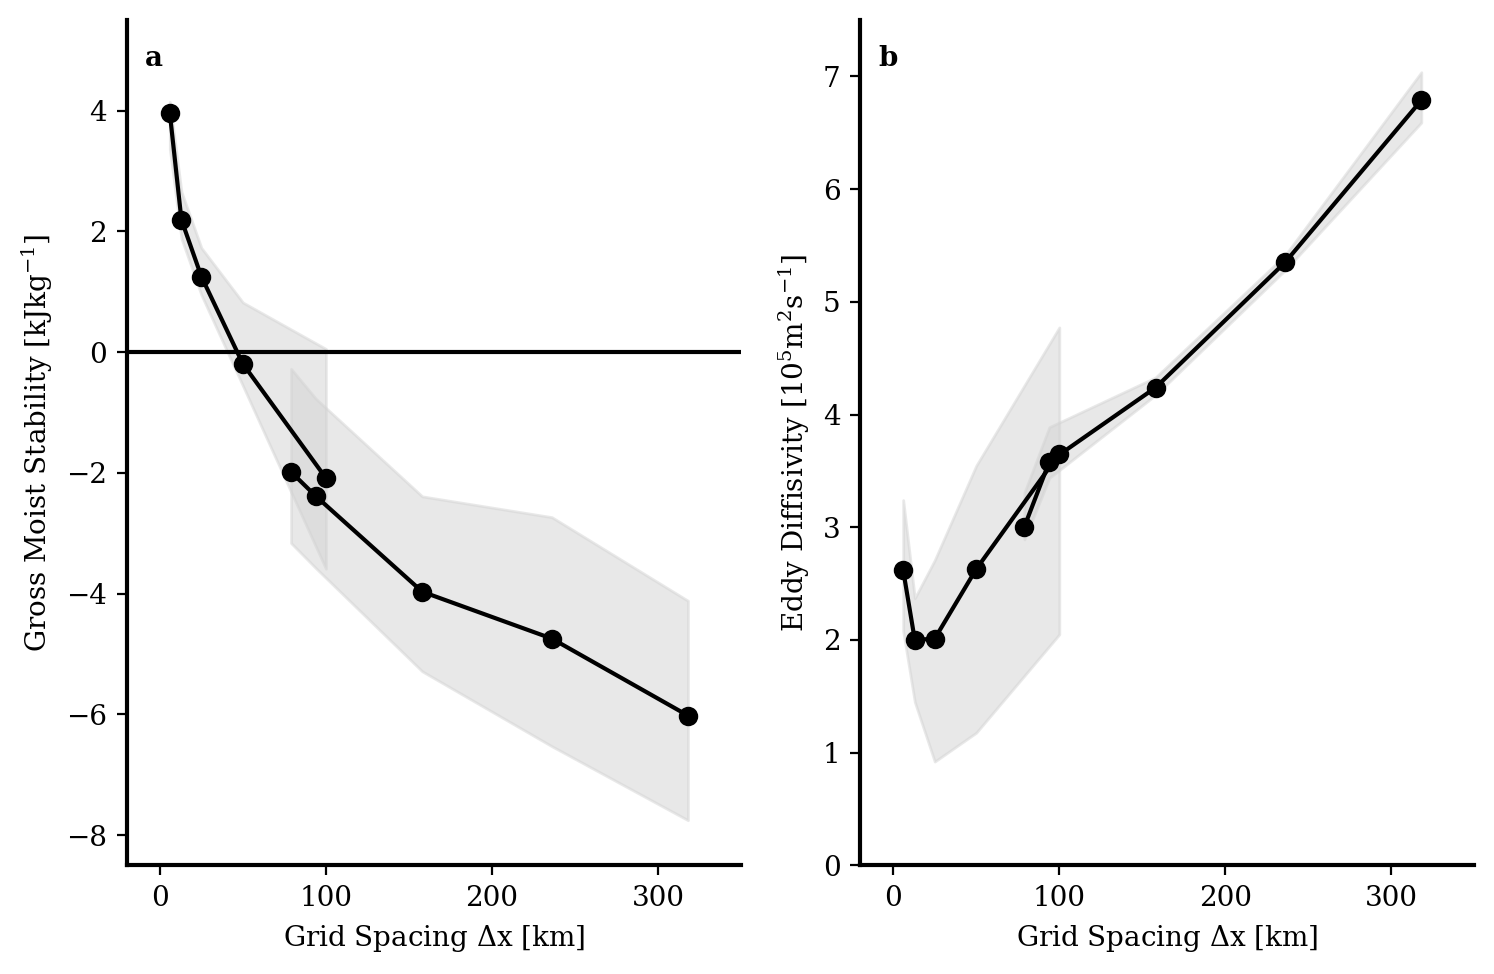

In [12]:

Mi=np.zeros([len(expsi),3])
Ei=np.zeros([len(expsi),3])
Ma=np.zeros([len(expsa),3])
Ea=np.zeros([len(expsa),3])

for iexp in range(0,len(expsi)):
    
    ds=np.load('meridional_'+expsi[iexp]+'.npz')
    Inlat=np.where((ds['LAT']>0) & (ds['LAT']<5))[0]

    tmp=ds['MET'][Inlat]/ds['PSI'][Inlat]/1e3
    Mi[iexp,0]=np.max(tmp)
    Mi[iexp,1]=np.mean(tmp)
    Mi[iexp,2]=np.min(tmp)    

    tmp=ds['D'][Inlat]/1e5
    Ei[iexp,0]=np.max(tmp)
    Ei[iexp,1]=np.mean(tmp)
    Ei[iexp,2]=np.min(tmp)    

for iexp in range(0,len(expsa)):
    
    ds=np.load('meridional_'+expsa[iexp]+'.npz')
    Inlat=np.where((ds['LAT']>0) & (ds['LAT']<5))[0]

    tmp=ds['MET'][Inlat]/ds['PSI'][Inlat]/1e3
    Ma[iexp,0]=np.max(tmp)
    Ma[iexp,1]=np.mean(tmp)
    Ma[iexp,2]=np.min(tmp)    

    tmp=ds['D'][Inlat]/1e5
    Ea[iexp,0]=np.max(tmp)
    Ea[iexp,1]=np.mean(tmp)
    Ea[iexp,2]=np.min(tmp)    

fig=plt.figure(figsize=(3.8*2,5))

ax = fig.add_subplot(1,2,1)

plt.plot([-20,350], [0,0], color='k')
plt.plot(resa, Ma[:,1], marker='o', color='k')
plt.plot(np.asarray(resi), Mi[:,1], marker='o', color='k')
plt.fill_between(resa, Ma[:,0], Ma[:,2], color='lightgray', alpha=0.5)
plt.fill_between(np.asarray(resi), Mi[:,0], Mi[:,2], color='lightgray', alpha=0.5)
plt.xlabel('Grid Spacing $\Delta x$ [km]')
plt.ylabel('Gross Moist Stability [$kJkg^{-1}$]')
plt.xlim([-20,350]);plt.ylim([-8.5,5.5])
plt.text(0.03, 0.97, 'a', transform=ax.transAxes, ha='left', va='top',fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax = fig.add_subplot(1,2,2)

plt.plot(resa, Ea[:,1], marker='o',color='k')
plt.plot(np.asarray(resi), Ei[:,1], marker='o',color='k')
plt.fill_between(resa, Ea[:,0], Ea[:,2], color='lightgray', alpha=0.5)
plt.fill_between(np.asarray(resi), Ei[:,0], Ei[:,2], color='lightgray', alpha=0.5)
plt.xlabel('Grid Spacing $\Delta x$ [km]')
plt.ylabel('Eddy Diffisivity [$10^5m^{2}s^{-1}$]')
plt.xlim([-20,350]);plt.ylim([0,7.5])
plt.text(0.03, 0.97, 'b', transform=ax.transAxes, ha='left', va='top',fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


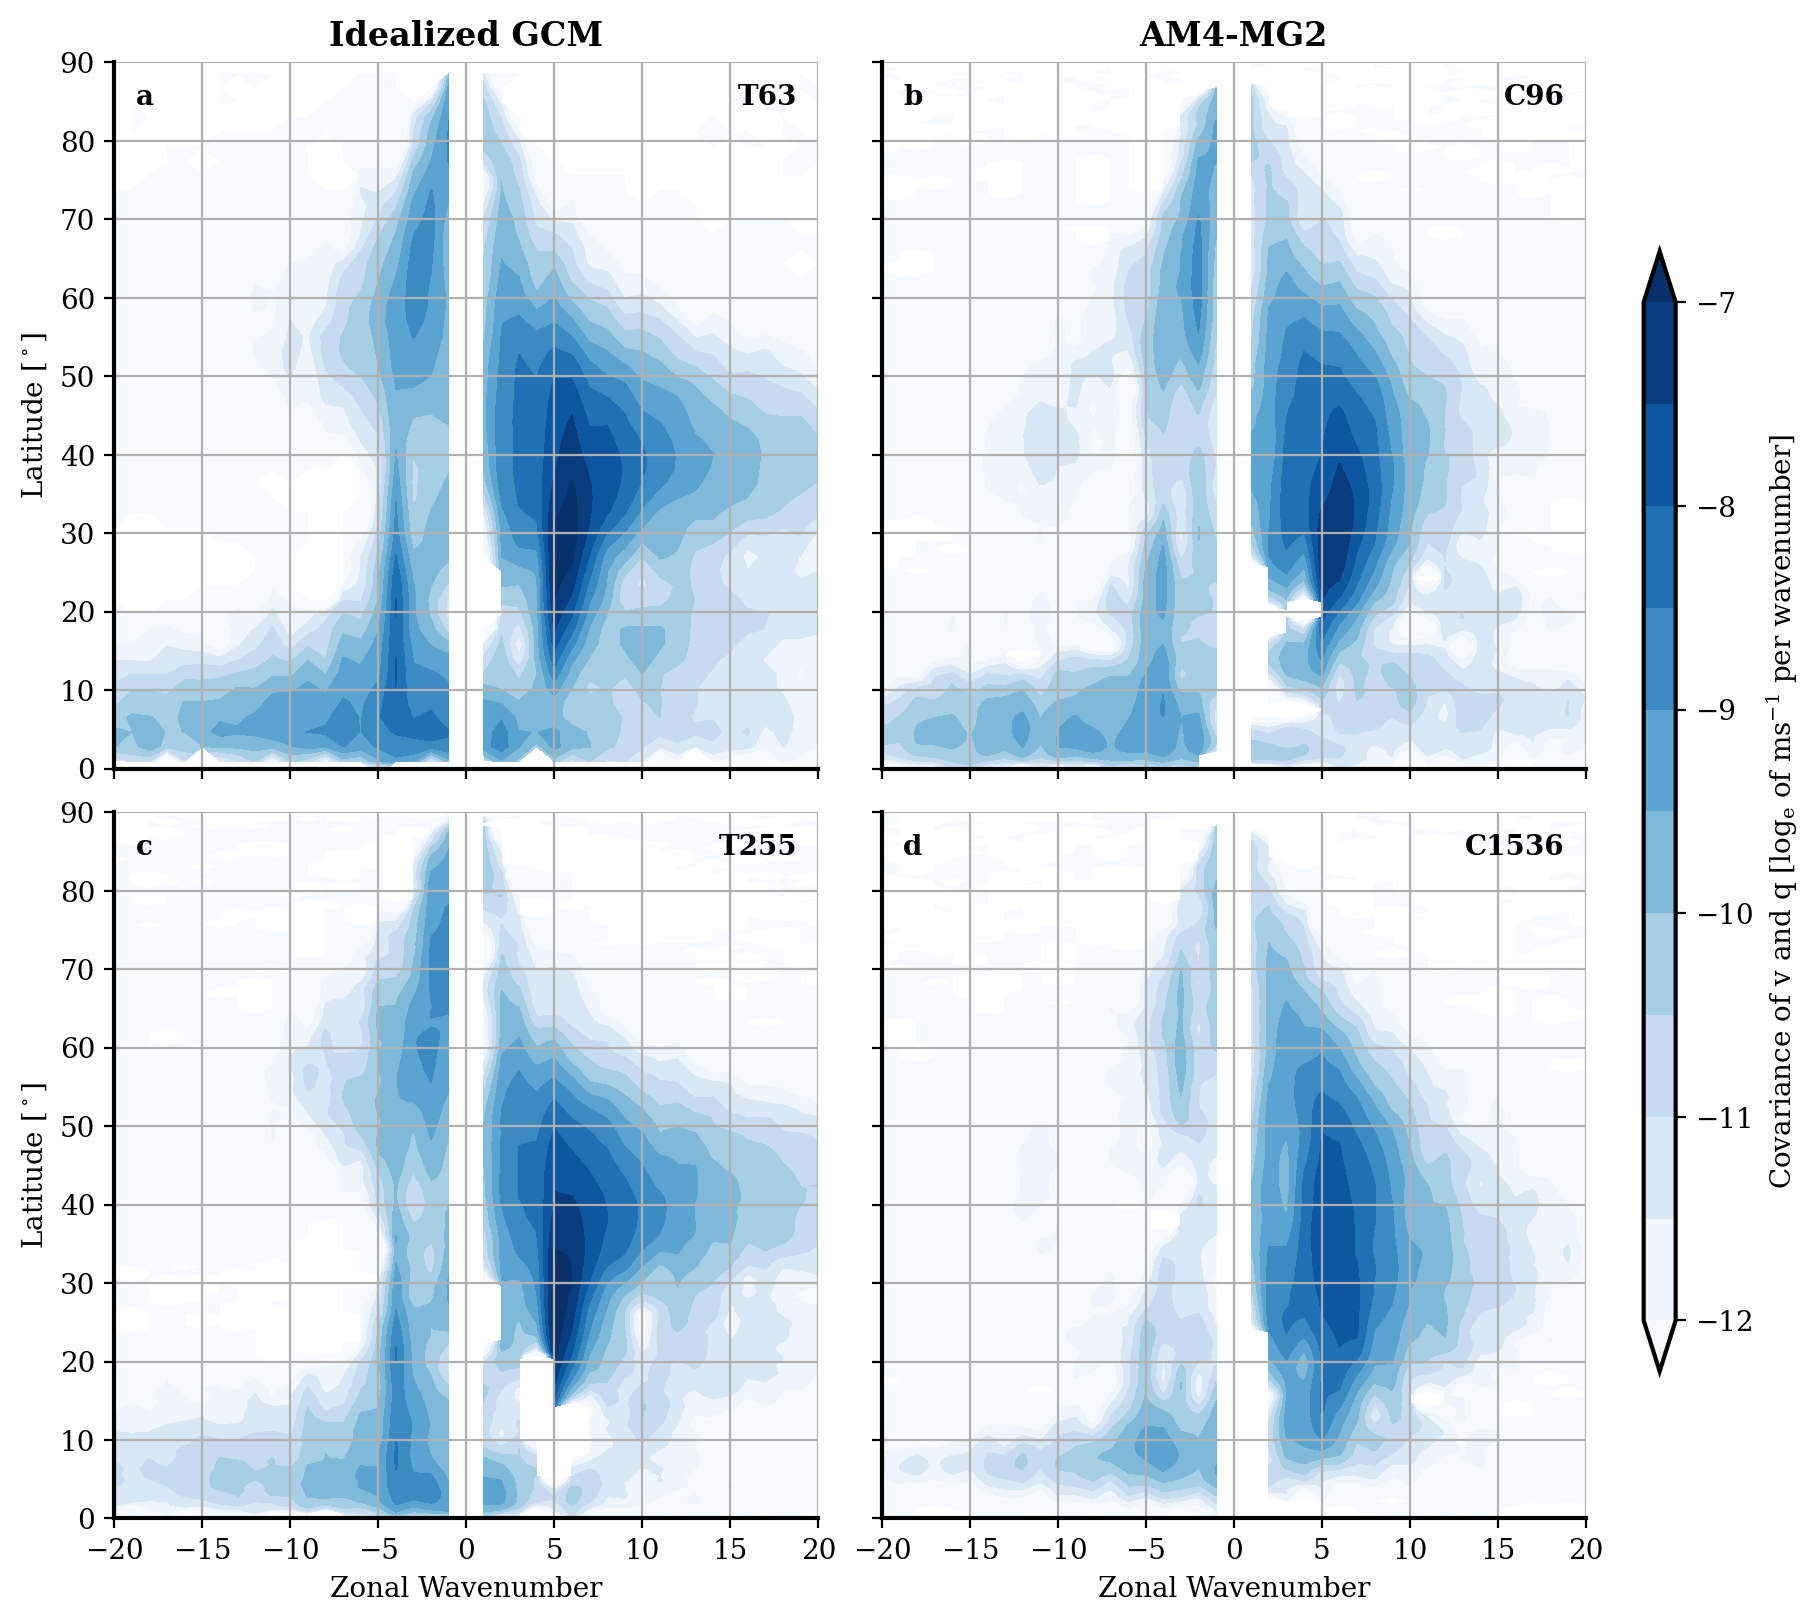

In [13]:

ds=np.load('fig_spectra_lat.npz')

fig,axs=plt.subplots(2,2,layout='constrained',sharex=True,sharey=True,figsize=(8,8))

levels=np.linspace(-12,-7,11)

c=axs[0,1].contourf(ds['x_C96'],ds['y_C96'],ds['z_C96'],levels=levels,cmap='Blues',extend='both')
c=axs[1,1].contourf(ds['x_C1536'],ds['y_C1536'],ds['z_C1536'],levels=levels,cmap='Blues',extend='both')
c=axs[0,0].contourf(ds['x_T63'],ds['y_T63'],ds['z_T63'],levels=levels,cmap='Blues',extend='both')
c=axs[1,0].contourf(ds['x_T255'],ds['y_T255'],ds['z_T255'],levels=levels,cmap='Blues',extend='both')

cax = fig.add_axes([1.02, 0.15, 0.02, 0.7]) 
cb=plt.colorbar(c,cax=cax)
cb.set_label('Covariance of $v$ and $q$ [$log_{e}$ of $ms^{-1}$ per wavenumber]')

axs[0,1].set(xlim=(-20,20),ylim=(0,90))

axs[0,1].text(0.97, 0.97, 'C96', transform=axs[0,1].transAxes, ha='right', va='top',fontweight='bold')
axs[0,0].text(0.97, 0.97, 'T63', transform=axs[0,0].transAxes, ha='right', va='top',fontweight='bold')
axs[1,1].text(0.97, 0.97, 'C1536', transform=axs[1,1].transAxes, ha='right', va='top',fontweight='bold')
axs[1,0].text(0.97, 0.97, 'T255', transform=axs[1,0].transAxes, ha='right', va='top',fontweight='bold')

axs[0,0].set(xlim=(-20,20),ylim=(0,90),ylabel='Latitude [$^\circ$]')
axs[1,0].set(ylabel='Latitude [$^\circ$]')
axs[1,1].set(xlabel='Zonal Wavenumber')

axs[0,1].set_title('AM4-MG2',fontweight='bold')
axs[0,0].set_title('Idealized GCM',fontweight='bold')
axs[1,0].set(xlabel='Zonal Wavenumber')
axs[1,1].set(xlabel='Zonal Wavenumber')

# makeup

axs[0,0].grid(True)
axs[1,0].grid(True)
axs[0,1].grid(True)
axs[1,1].grid(True)

axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

plt.show()

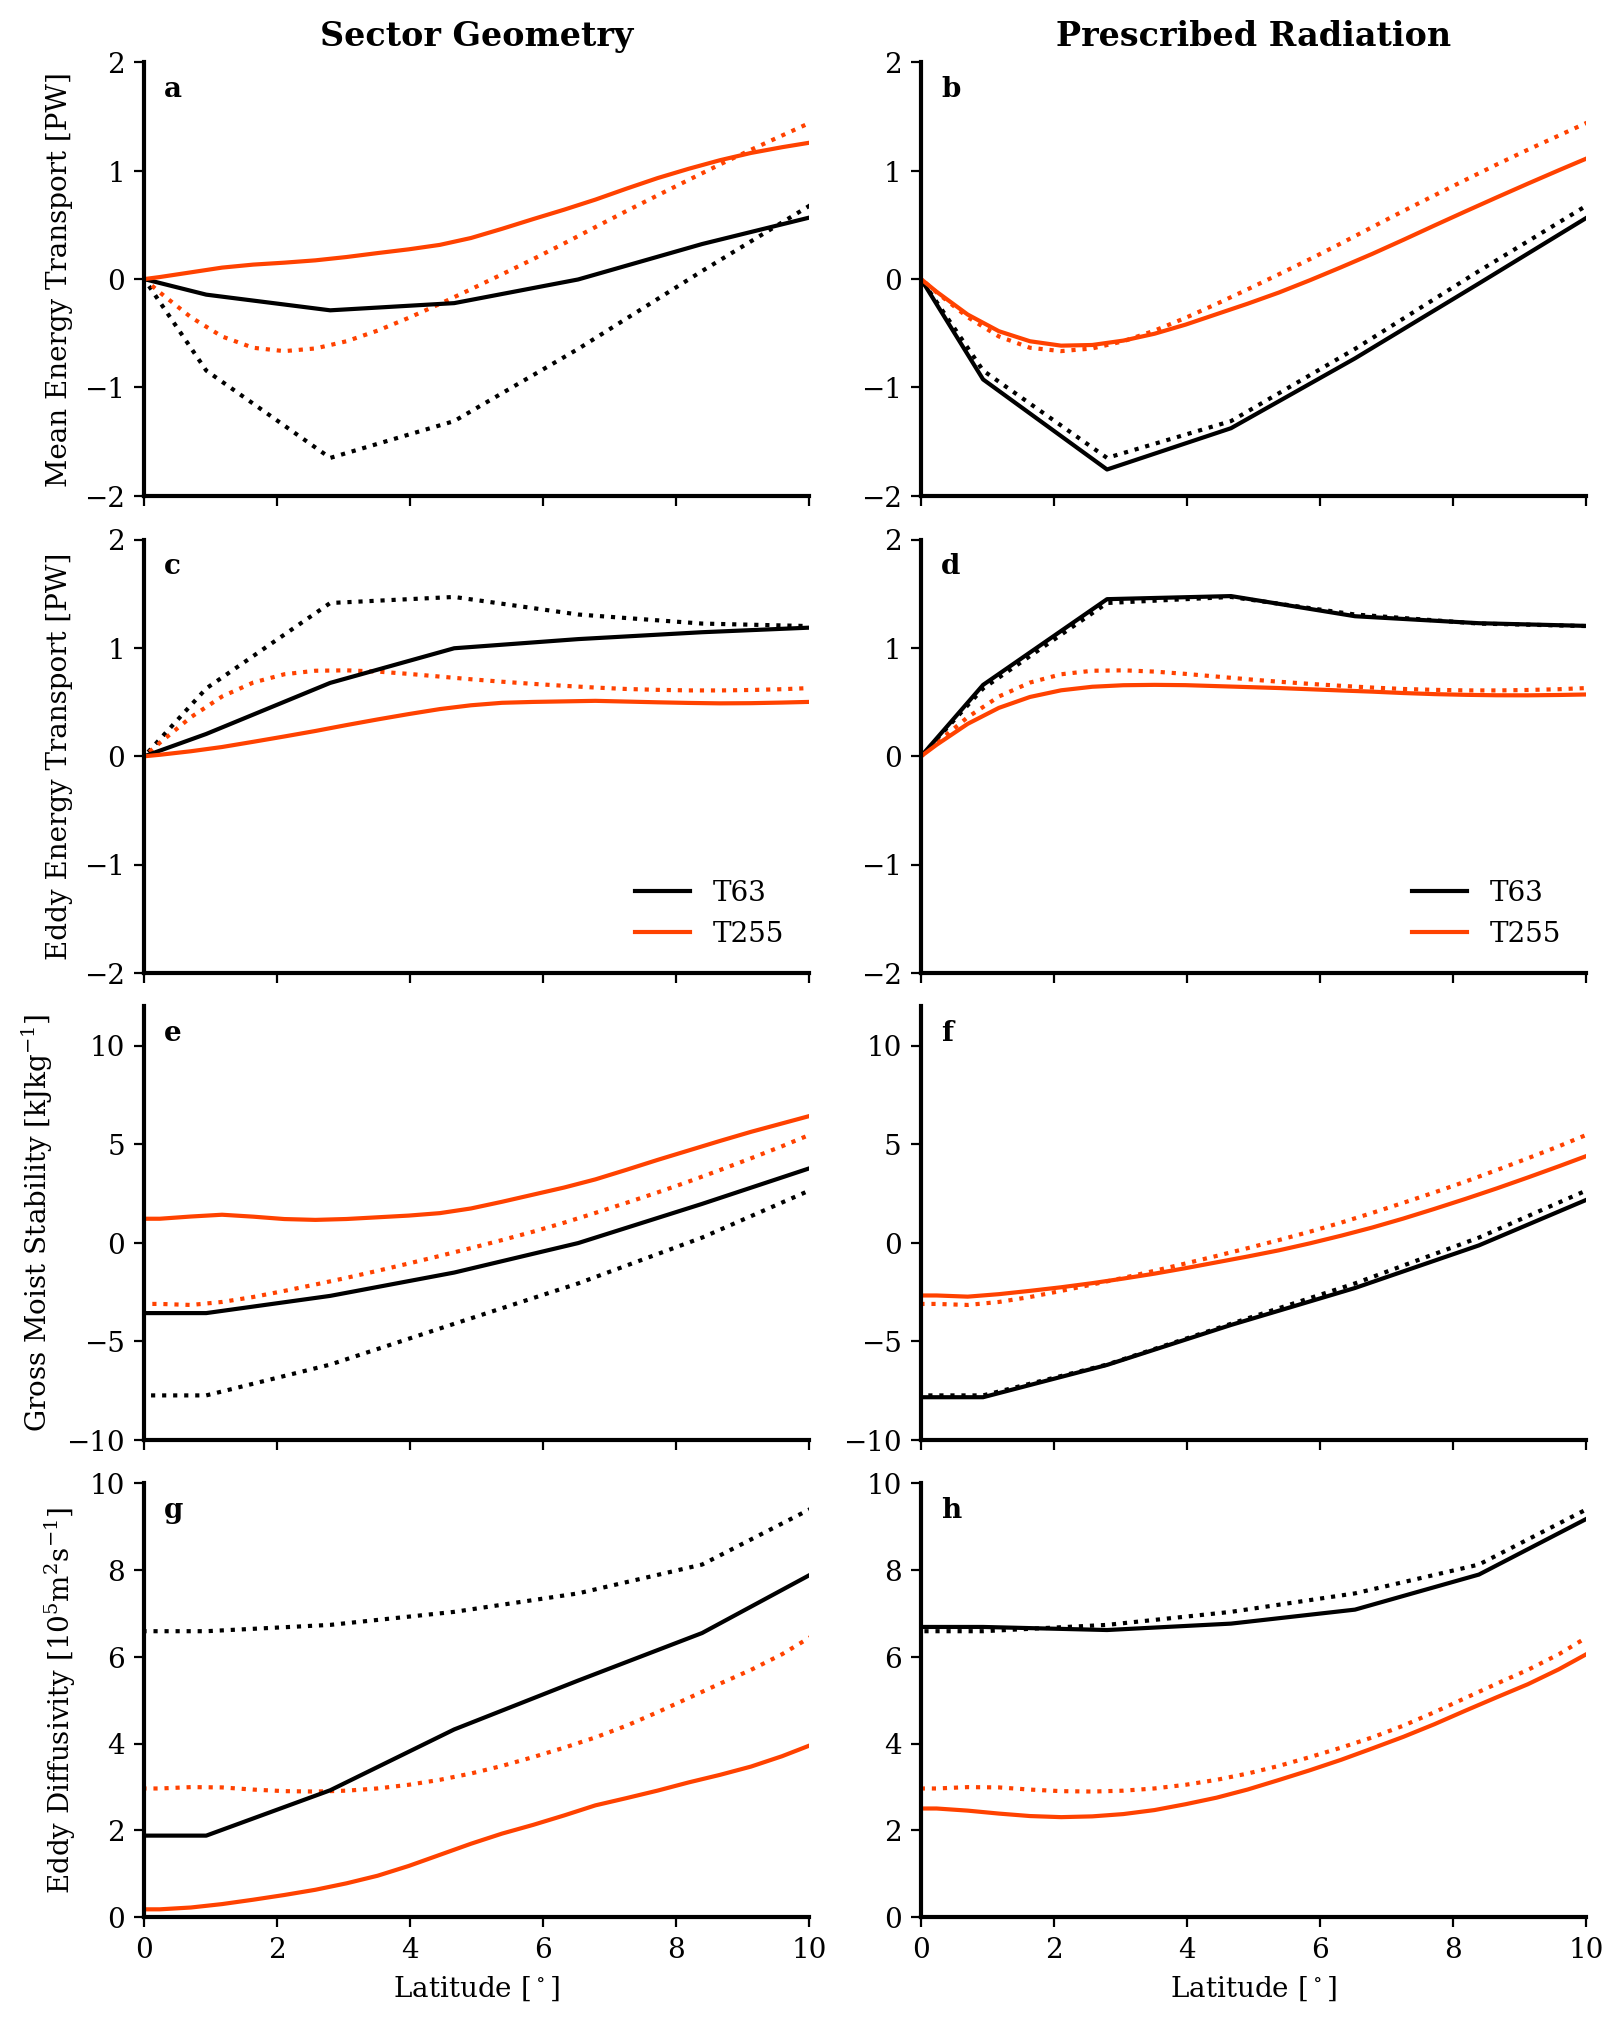

In [14]:
fig,axs=plt.subplots(4,2,sharex=True,layout='constrained',figsize=(8,10))

exp = ['T63','T255'] 
ccode=('#000000','#FF4200')

for iexp in range(0,2,1):
    
    ds=np.load('meridional_'+exp[iexp]+'.npz')
    
    axs[2,0].plot(ds['LAT'],ds['MET']/ds['PSI']/1e3,':',color=ccode[iexp],label=None)
    axs[2,1].plot(ds['LAT'],ds['MET']/ds['PSI']/1e3,':',color=ccode[iexp],label=None)    
    axs[3,0].plot(ds['LAT'],ds['D']/1e5,':',color=ccode[iexp])
    axs[3,1].plot(ds['LAT'],ds['D']/1e5,':',color=ccode[iexp])    
    axs[0,0].plot(ds['LAT'],ds['MET']/1e15,':',color=ccode[iexp],label=None)
    axs[0,1].plot(ds['LAT'],ds['MET']/1e15,':',color=ccode[iexp],label=None)
    axs[1,0].plot(ds['LAT'],(ds['TET']-ds['MET'])/1e15,':',color=ccode[iexp],label=None)
    axs[1,1].plot(ds['LAT'],(ds['TET']-ds['MET'])/1e15,':',color=ccode[iexp],label=None)

for iexp in range(0,2,1):
    
    ds=np.load('meridional_'+exp[iexp]+'_SEC.npz')
    
    axs[2,0].plot(ds['LAT'],ds['MET']/ds['PSI']/1e3,color=ccode[iexp],label=exp[iexp])
    axs[3,0].plot(ds['LAT'],ds['D']/1e5,color=ccode[iexp])
    axs[0,0].plot(ds['LAT'],ds['MET']/1e15,color=ccode[iexp],label=exp[iexp])
    axs[1,0].plot(ds['LAT'],(ds['TET']-ds['MET'])/1e15,color=ccode[iexp],label=exp[iexp])

for iexp in range(0,2,1):
    
    ds=np.load('meridional_'+exp[iexp]+'_RAD.npz')
    
    axs[2,1].plot(ds['LAT'],ds['MET']/ds['PSI']/1e3,color=ccode[iexp],label=exp[iexp])   
    axs[3,1].plot(ds['LAT'],ds['D']/1e5,color=ccode[iexp])  
    axs[0,1].plot(ds['LAT'],ds['MET']/1e15,color=ccode[iexp],label=exp[iexp])
    axs[1,1].plot(ds['LAT'],(ds['TET']-ds['MET'])/1e15,color=ccode[iexp],label=exp[iexp])


axs[1,0].legend(frameon=False,loc='lower right')
axs[1,1].legend(frameon=False,loc='lower right')
axs[0,0].set_title('Sector Geometry',fontweight='bold')
axs[0,1].set_title('Prescribed Radiation',fontweight='bold')

axs[0,0].set(ylabel='Mean Energy Transport [PW]')
axs[1,0].set(ylabel='Eddy Energy Transport [PW]')
axs[0,0].set(ylim=(-2,2),xlim=(0,10))
axs[0,1].set(ylim=(-2,2))
axs[1,0].set(ylim=(-2,2))
axs[1,1].set(ylim=(-2,2))

axs[2,0].set(ylim=(-10,12))
axs[2,0].set(ylabel='Gross Moist Stability [kJ$kg^{-1}$]',ylim=(-10,12))
axs[3,0].set(xlabel='Latitude [$^\circ$]',ylabel='Eddy Diffusivity [$10^5m^2s^{-1}$]',ylim=(0,10))
axs[2,1].set(ylim=(-10,12))
axs[3,1].set(xlabel='Latitude [$^\circ$]')
axs[3,1].set(ylim=(0,10))

# makeup
axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

axs[2,0].text(0.03, 0.97, 'e', transform=axs[2,0].transAxes, ha='left', va='top',fontweight='bold')
axs[3,0].text(0.03, 0.97, 'g', transform=axs[3,0].transAxes, ha='left', va='top',fontweight='bold')
axs[2,0].spines['top'].set_visible(False)
axs[2,0].spines['right'].set_visible(False)
axs[3,0].spines['top'].set_visible(False)
axs[3,0].spines['right'].set_visible(False)

axs[2,1].text(0.03, 0.97, 'f', transform=axs[2,1].transAxes, ha='left', va='top',fontweight='bold')
axs[3,1].text(0.03, 0.97, 'h', transform=axs[3,1].transAxes, ha='left', va='top',fontweight='bold')
axs[2,1].spines['top'].set_visible(False)
axs[2,1].spines['right'].set_visible(False)
axs[3,1].spines['top'].set_visible(False)
axs[3,1].spines['right'].set_visible(False)

plt.show()

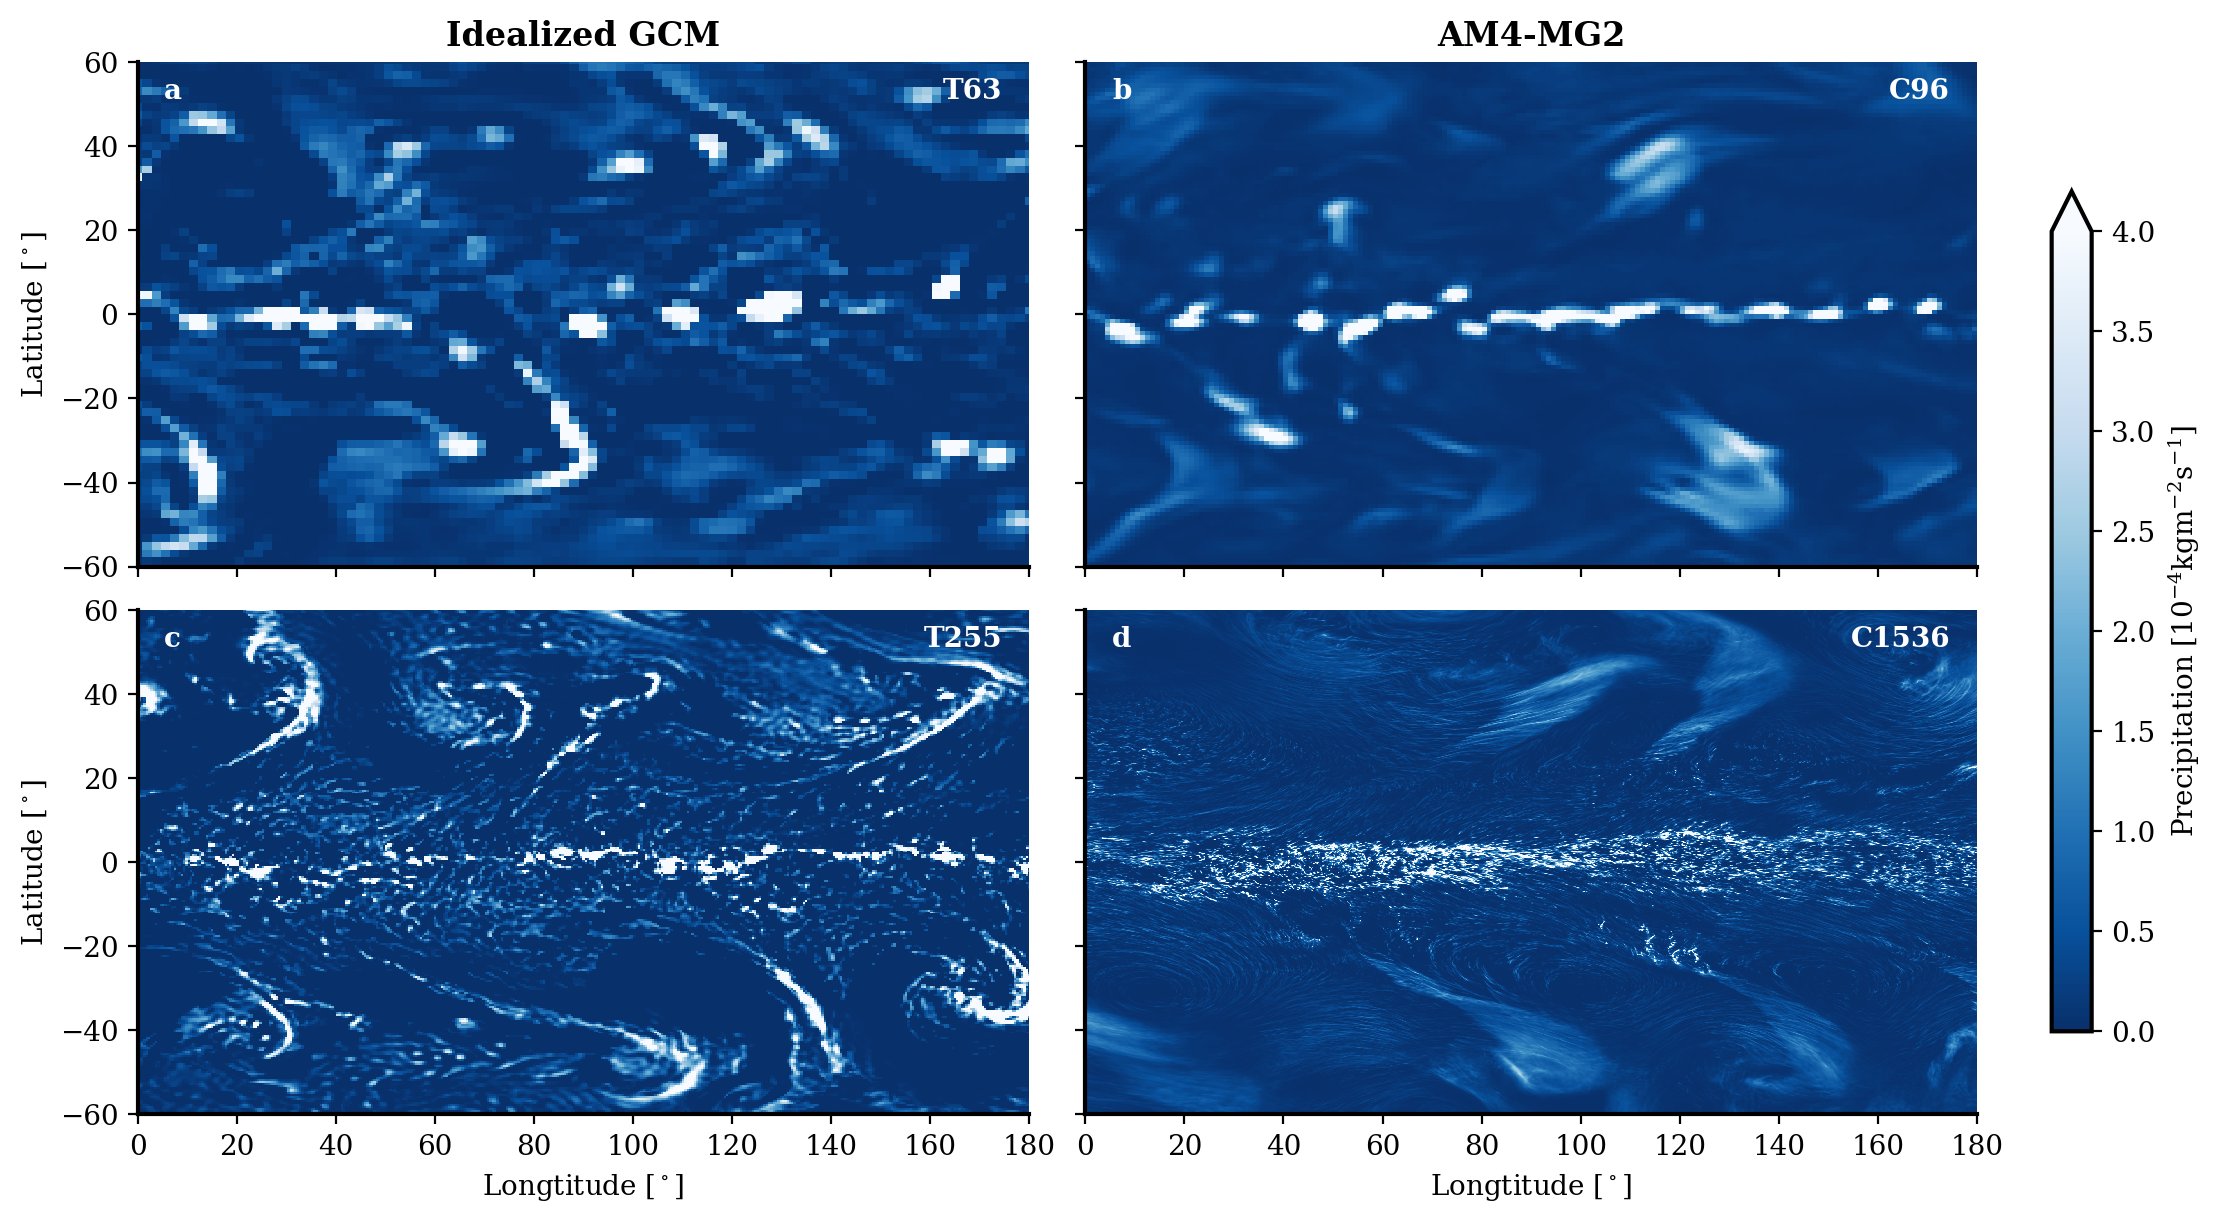

In [15]:
fig,axs=plt.subplots(2,2,layout='constrained',sharex=True,sharey=True,figsize=(10,6))

vmin=0
vmax=4

ds=xr.open_dataset('T63_snapshot.nc')
c=axs[0,0].pcolormesh(ds.lon,ds.lat,ds.precipitation*1e4,vmin=vmin,vmax=vmax,cmap='Blues_r')
ds.close()

ds=xr.open_dataset('C96_snapshot.nc')
c=axs[0,1].pcolormesh(ds.lon,ds.lat,ds.precip*1e4,vmin=vmin,vmax=vmax,cmap='Blues_r')
ds.close()

ds=xr.open_dataset('T255_snapshot.nc')
c=axs[1,0].pcolormesh(ds.lon,ds.lat,ds.precipitation*1e4,vmin=vmin,vmax=vmax,cmap='Blues_r')
ds.close()

ds=xr.open_dataset('C1536_snapshot.nc')
c=axs[1,1].pcolormesh(ds.grid_xt,ds.grid_yt,ds.precip*1e4,vmin=vmin,vmax=vmax,cmap='Blues_r')
ds.close()

cax = fig.add_axes([1.02, 0.15, 0.02, 0.7]) 
cb=plt.colorbar(c,cax=cax,extend="max")
cb.set_label('Precipitation [$10^{-4}kgm^{-2}s^{-1}$]')

axs[0,0].set(xlim=(0,180),ylim=(-60,60))
axs[0,1].text(0.97, 0.97, 'C96', transform=axs[0,1].transAxes, ha='right', va='top',fontweight='bold',color='w')
axs[0,0].text(0.97, 0.97, 'T63', transform=axs[0,0].transAxes, ha='right', va='top',fontweight='bold',color='w')
axs[1,1].text(0.97, 0.97, 'C1536', transform=axs[1,1].transAxes, ha='right', va='top',fontweight='bold',color='w')
axs[1,0].text(0.97, 0.97, 'T255', transform=axs[1,0].transAxes, ha='right', va='top',fontweight='bold',color='w')

axs[0,0].set(ylabel='Latitude [$^\circ$]')
axs[1,0].set(ylabel='Latitude [$^\circ$]')

axs[0,1].set_title('AM4-MG2',fontweight='bold')
axs[0,0].set_title('Idealized GCM',fontweight='bold')
axs[1,0].set(xlabel='Longtitude [$^\circ$]')
axs[1,1].set(xlabel='Longtitude [$^\circ$]')

# makeup

axs[0,0].text(0.03, 0.97, 'a', transform=axs[0,0].transAxes, ha='left', va='top',fontweight='bold',color='w')
axs[1,0].text(0.03, 0.97, 'c', transform=axs[1,0].transAxes, ha='left', va='top',fontweight='bold',color='w')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

axs[0,1].text(0.03, 0.97, 'b', transform=axs[0,1].transAxes, ha='left', va='top',fontweight='bold',color='w')
axs[1,1].text(0.03, 0.97, 'd', transform=axs[1,1].transAxes, ha='left', va='top',fontweight='bold',color='w')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

plt.show()